In [1]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import optuna
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# 解决中文乱码问题
plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False 

c:\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data=pd.read_csv('./data_try_2.csv')
train_data,test_data=train_test_split(data,test_size=0.2, random_state=1318)
feature=train_data.drop(['Ea','Unnamed: 0'],axis=1)
label=train_data['Ea']
x_test=test_data.drop(['Ea','Unnamed: 0'],axis=1)
y_test=test_data['Ea']

In [3]:
kfold = KFold(n_splits = 5, random_state = 1314, shuffle = True)

In [4]:
def optuna_objective(trial):
    gamma=trial.suggest_float('gamma',0.001,0.4)
    C=trial.suggest_int('C',50,150,1)
    epsilon=trial.suggest_float('espilon',0.001,1)
    reg=SVR(gamma=gamma,C=C,epsilon=epsilon)
    loss=cross_val_score(reg,feature,label,cv=kfold,error_score='raise')
    return pow(abs(loss.mean()),0.5)

In [5]:
def optimizer_optuna(n_trials):
    algo=optuna.samplers.TPESampler(n_startup_trials=10,n_ei_candidates=24)
    study=optuna.create_study(sampler=algo,direction="maximize")
    study.optimize(optuna_objective,n_trials=n_trials,show_progress_bar=True)
    print("\n","\n","best params: ", study.best_trial.params,
          "\n","\n","best score: ", study.best_trial.values,
          "\n")
    
    return study.best_trial.params, study.best_trial.values

In [6]:
optimizer_optuna(500)

[I 2023-07-11 22:46:26,931] A new study created in memory with name: no-name-bdbbb511-8d45-47e1-b57c-33f296825eac
Best trial: 1. Best value: 0.853136:   1%|          | 5/500 [00:00<00:16, 30.57it/s]

[I 2023-07-11 22:46:26,958] Trial 0 finished with value: 0.24465683854921724 and parameters: {'gamma': 0.04551304014058871, 'C': 108, 'espilon': 0.7995033472069947}. Best is trial 0 with value: 0.24465683854921724.
[I 2023-07-11 22:46:26,989] Trial 1 finished with value: 0.8531355856613125 and parameters: {'gamma': 0.017231159448812546, 'C': 63, 'espilon': 0.0941197451257057}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:27,015] Trial 2 finished with value: 0.8260475759508936 and parameters: {'gamma': 0.22102305762508154, 'C': 115, 'espilon': 0.21916552430223185}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:27,059] Trial 3 finished with value: 0.8381572105475484 and parameters: {'gamma': 0.3946377617472501, 'C': 120, 'espilon': 0.09707683669923599}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:27,094] Trial 4 finished with value: 0.3322985062614136 and parameters: {'gamma': 0.13495914349044968, 'C': 83, 'espilon': 0.

Best trial: 1. Best value: 0.853136:   2%|▏         | 11/500 [00:00<00:16, 29.32it/s]

[I 2023-07-11 22:46:27,169] Trial 6 finished with value: 0.835448273936449 and parameters: {'gamma': 0.05998426741804014, 'C': 79, 'espilon': 0.057024771935688376}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:27,200] Trial 7 finished with value: 0.6265069487547823 and parameters: {'gamma': 0.1010535158711533, 'C': 96, 'espilon': 0.5030121991175828}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:27,228] Trial 8 finished with value: 0.24465683854921724 and parameters: {'gamma': 0.11282529457146119, 'C': 69, 'espilon': 0.8815354018675081}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:27,263] Trial 9 finished with value: 0.24465683854921724 and parameters: {'gamma': 0.3399889229378998, 'C': 60, 'espilon': 0.7630658057275634}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:27,302] Trial 10 finished with value: 0.8305911564485899 and parameters: {'gamma': 0.010750559488646338, 'C': 147, 'espilon': 0.263

Best trial: 1. Best value: 0.853136:   3%|▎         | 15/500 [00:00<00:17, 27.01it/s]

[I 2023-07-11 22:46:27,353] Trial 11 finished with value: 0.8418036363262423 and parameters: {'gamma': 0.3574961283149362, 'C': 50, 'espilon': 0.051022343221711085}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:27,391] Trial 12 finished with value: 0.8420200006810491 and parameters: {'gamma': 0.2442530975831882, 'C': 52, 'espilon': 0.0058501223279391334}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:27,429] Trial 13 finished with value: 0.8265412538167396 and parameters: {'gamma': 0.21520699059299406, 'C': 51, 'espilon': 0.2909516990534959}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:27,475] Trial 14 finished with value: 0.822154393102043 and parameters: {'gamma': 0.27218128358217003, 'C': 71, 'espilon': 0.16910871254986984}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:27,520] Trial 15 finished with value: 0.837392163869849 and parameters: {'gamma': 0.17666661775471898, 'C': 89, 'espilon': 0.

Best trial: 1. Best value: 0.853136:   4%|▍         | 20/500 [00:00<00:19, 24.76it/s]

[I 2023-07-11 22:46:27,565] Trial 16 finished with value: 0.7913596894640402 and parameters: {'gamma': 0.003968743618321464, 'C': 63, 'espilon': 0.3676141469723943}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:27,616] Trial 17 finished with value: 0.8313237146747046 and parameters: {'gamma': 0.26114190640995777, 'C': 76, 'espilon': 0.15507827444624941}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:27,652] Trial 18 finished with value: 0.837781382758422 and parameters: {'gamma': 0.08809343777180473, 'C': 60, 'espilon': 0.004381718422346026}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:27,687] Trial 19 finished with value: 0.7735248050262421 and parameters: {'gamma': 0.16748769206739117, 'C': 90, 'espilon': 0.37373060607013}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:27,736] Trial 20 finished with value: 0.8479740918718656 and parameters: {'gamma': 0.13481862421663543, 'C': 50, 'espilon': 0.1

Best trial: 1. Best value: 0.853136:   5%|▍         | 23/500 [00:00<00:21, 22.58it/s]

[I 2023-07-11 22:46:27,781] Trial 21 finished with value: 0.847658734710084 and parameters: {'gamma': 0.07476534534473053, 'C': 50, 'espilon': 0.14320676622310144}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:27,842] Trial 22 finished with value: 0.8449991059742735 and parameters: {'gamma': 0.07398505634137587, 'C': 66, 'espilon': 0.12919242055708652}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:27,922] Trial 23 finished with value: 0.8352332634760496 and parameters: {'gamma': 0.03883113201468502, 'C': 60, 'espilon': 0.20398898344730018}. Best is trial 1 with value: 0.8531355856613125.


Best trial: 1. Best value: 0.853136:   6%|▌         | 29/500 [00:01<00:22, 21.32it/s]

[I 2023-07-11 22:46:27,980] Trial 24 finished with value: 0.847771957021042 and parameters: {'gamma': 0.11657247063881354, 'C': 50, 'espilon': 0.12178124264136142}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:28,021] Trial 25 finished with value: 0.8459172114557058 and parameters: {'gamma': 0.12385524281963337, 'C': 59, 'espilon': 0.11020149970286784}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:28,065] Trial 26 finished with value: 0.8260150756733385 and parameters: {'gamma': 0.11285766830150099, 'C': 73, 'espilon': 0.23637990160148956}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:28,109] Trial 27 finished with value: 0.8282140010411809 and parameters: {'gamma': 0.14389395345247624, 'C': 55, 'espilon': 0.3034580010786364}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:28,151] Trial 28 finished with value: 0.8390377176375463 and parameters: {'gamma': 0.03271251442829268, 'C': 84, 'espilon': 0.

Best trial: 1. Best value: 0.853136:   7%|▋         | 33/500 [00:01<00:22, 20.47it/s]

[I 2023-07-11 22:46:28,230] Trial 29 finished with value: 0.8350883404689836 and parameters: {'gamma': 0.053840315660332955, 'C': 68, 'espilon': 0.1998392312719383}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:28,267] Trial 30 finished with value: 0.8007394476453884 and parameters: {'gamma': 0.10290092583692112, 'C': 104, 'espilon': 0.35131600798431917}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:28,315] Trial 31 finished with value: 0.8450326661400389 and parameters: {'gamma': 0.0832827743712109, 'C': 50, 'espilon': 0.12666826690041744}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:28,355] Trial 32 finished with value: 0.8390488773382653 and parameters: {'gamma': 0.07063062560569891, 'C': 56, 'espilon': 0.1686752373276378}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:28,399] Trial 33 finished with value: 0.8490233711156255 and parameters: {'gamma': 0.022002848316638478, 'C': 66, 'espilon': 

Best trial: 1. Best value: 0.853136:   8%|▊         | 38/500 [00:01<00:23, 19.64it/s]

[I 2023-07-11 22:46:28,464] Trial 34 finished with value: 0.8395114527827611 and parameters: {'gamma': 0.047387721295790955, 'C': 113, 'espilon': 0.08456268159292121}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:28,506] Trial 35 finished with value: 0.8339826990804968 and parameters: {'gamma': 0.013032680784764862, 'C': 65, 'espilon': 0.21516145081868499}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:28,560] Trial 36 finished with value: 0.8371071669372804 and parameters: {'gamma': 0.03877650741994117, 'C': 79, 'espilon': 0.08763321118148192}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:28,626] Trial 37 finished with value: 0.8340754893564933 and parameters: {'gamma': 0.02853473681899857, 'C': 138, 'espilon': 0.0513660749362394}. Best is trial 1 with value: 0.8531355856613125.


Best trial: 1. Best value: 0.853136:   8%|▊         | 40/500 [00:01<00:24, 18.72it/s]

[I 2023-07-11 22:46:28,695] Trial 38 finished with value: 0.8181587562980057 and parameters: {'gamma': 0.13814785729308046, 'C': 122, 'espilon': 0.25320176436351255}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:28,751] Trial 39 finished with value: 0.8363762369080668 and parameters: {'gamma': 0.058294452924744, 'C': 56, 'espilon': 0.05465299268181073}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:28,812] Trial 40 finished with value: 0.8366504282546127 and parameters: {'gamma': 0.10201252286189802, 'C': 99, 'espilon': 0.19024658463794258}. Best is trial 1 with value: 0.8531355856613125.


Best trial: 1. Best value: 0.853136:   9%|▊         | 43/500 [00:02<00:27, 16.88it/s]

[I 2023-07-11 22:46:28,901] Trial 41 finished with value: 0.8476959824952113 and parameters: {'gamma': 0.08687241313011335, 'C': 64, 'espilon': 0.1432955787757495}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:28,975] Trial 42 finished with value: 0.8467247512655451 and parameters: {'gamma': 0.12263752303015049, 'C': 63, 'espilon': 0.1350741221841404}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:29,080] Trial 43 finished with value: 0.8504809210226132 and parameters: {'gamma': 0.02461169694551888, 'C': 75, 'espilon': 0.0913228802385567}. Best is trial 1 with value: 0.8531355856613125.


Best trial: 1. Best value: 0.853136:   9%|▉         | 46/500 [00:02<00:31, 14.23it/s]

[I 2023-07-11 22:46:29,144] Trial 44 finished with value: 0.832938706230666 and parameters: {'gamma': 0.0028435359004553226, 'C': 76, 'espilon': 0.043161295367780156}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:29,242] Trial 45 finished with value: 0.8522270657570951 and parameters: {'gamma': 0.019098027820949555, 'C': 71, 'espilon': 0.09095381512153367}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:29,305] Trial 46 finished with value: 0.8460366908417041 and parameters: {'gamma': 0.02811395610881466, 'C': 85, 'espilon': 0.09075594608454876}. Best is trial 1 with value: 0.8531355856613125.


Best trial: 1. Best value: 0.853136:  10%|█         | 50/500 [00:02<00:30, 14.74it/s]

[I 2023-07-11 22:46:29,360] Trial 47 finished with value: 0.8440021163974403 and parameters: {'gamma': 0.018028233921471487, 'C': 71, 'espilon': 0.18154044313714232}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:29,425] Trial 48 finished with value: 0.8358938643092384 and parameters: {'gamma': 0.05304729932337259, 'C': 79, 'espilon': 0.0018051451646962091}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:29,498] Trial 49 finished with value: 0.844376027967909 and parameters: {'gamma': 0.01999472990028653, 'C': 90, 'espilon': 0.034790720339776614}. Best is trial 1 with value: 0.8531355856613125.


Best trial: 1. Best value: 0.853136:  10%|█         | 52/500 [00:02<00:29, 15.07it/s]

[I 2023-07-11 22:46:29,555] Trial 50 finished with value: 0.8273296422435935 and parameters: {'gamma': 0.004157114372736213, 'C': 74, 'espilon': 0.24010774476038993}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:29,620] Trial 51 finished with value: 0.841237536494495 and parameters: {'gamma': 0.06438324685233772, 'C': 55, 'espilon': 0.09826687033566489}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:29,714] Trial 52 finished with value: 0.8346399924777949 and parameters: {'gamma': 0.040486789353803426, 'C': 70, 'espilon': 0.05331663102553446}. Best is trial 1 with value: 0.8531355856613125.


Best trial: 1. Best value: 0.853136:  11%|█         | 56/500 [00:02<00:30, 14.68it/s]

[I 2023-07-11 22:46:29,772] Trial 53 finished with value: 0.8463384354451169 and parameters: {'gamma': 0.029057712532970844, 'C': 58, 'espilon': 0.11365150292734566}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:29,831] Trial 54 finished with value: 0.8388781329667541 and parameters: {'gamma': 0.05666123267709804, 'C': 54, 'espilon': 0.17690857306059815}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:29,904] Trial 55 finished with value: 0.8470258617388816 and parameters: {'gamma': 0.017736371650095603, 'C': 62, 'espilon': 0.028845496685310876}. Best is trial 1 with value: 0.8531355856613125.


Best trial: 1. Best value: 0.853136:  12%|█▏        | 58/500 [00:03<00:30, 14.43it/s]

[I 2023-07-11 22:46:29,986] Trial 56 finished with value: 0.8445885825810705 and parameters: {'gamma': 0.16601762397611303, 'C': 67, 'espilon': 0.14735715696500373}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:30,051] Trial 57 finished with value: 0.8394961460118903 and parameters: {'gamma': 0.07139002511513703, 'C': 59, 'espilon': 0.0731946159275476}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:30,106] Trial 58 finished with value: 0.840308876510829 and parameters: {'gamma': 0.0924743428176365, 'C': 53, 'espilon': 0.0953319440472326}. Best is trial 1 with value: 0.8531355856613125.


Best trial: 1. Best value: 0.853136:  12%|█▏        | 62/500 [00:03<00:30, 14.55it/s]

[I 2023-07-11 22:46:30,189] Trial 59 finished with value: 0.8362923420444558 and parameters: {'gamma': 0.0513898518881864, 'C': 68, 'espilon': 0.2730185801846026}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:30,260] Trial 60 finished with value: 0.8280097311345312 and parameters: {'gamma': 0.003267793344424459, 'C': 77, 'espilon': 0.21778208924329379}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:30,316] Trial 61 finished with value: 0.8457133096672395 and parameters: {'gamma': 0.07911567461015467, 'C': 62, 'espilon': 0.13407348636807598}. Best is trial 1 with value: 0.8531355856613125.


Best trial: 1. Best value: 0.853136:  13%|█▎        | 64/500 [00:03<00:30, 14.49it/s]

[I 2023-07-11 22:46:30,393] Trial 62 finished with value: 0.8454821317619998 and parameters: {'gamma': 0.126346245160448, 'C': 63, 'espilon': 0.15738852403273054}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:30,462] Trial 63 finished with value: 0.8457117030700376 and parameters: {'gamma': 0.0904420810526135, 'C': 82, 'espilon': 0.11802017798605029}. Best is trial 1 with value: 0.8531355856613125.
[I 2023-07-11 22:46:30,530] Trial 64 finished with value: 0.8380865517737329 and parameters: {'gamma': 0.04488975797889323, 'C': 65, 'espilon': 0.023807033532470587}. Best is trial 1 with value: 0.8531355856613125.


Best trial: 66. Best value: 0.85436:  14%|█▎        | 68/500 [00:03<00:29, 14.40it/s] 

[I 2023-07-11 22:46:30,590] Trial 65 finished with value: 0.8532757447158394 and parameters: {'gamma': 0.02094574219238249, 'C': 50, 'espilon': 0.06788531200171495}. Best is trial 65 with value: 0.8532757447158394.
[I 2023-07-11 22:46:30,678] Trial 66 finished with value: 0.8543596794768462 and parameters: {'gamma': 0.017153845045211873, 'C': 52, 'espilon': 0.06937605774452674}. Best is trial 66 with value: 0.8543596794768462.
[I 2023-07-11 22:46:30,736] Trial 67 finished with value: 0.852945456210716 and parameters: {'gamma': 0.019422139186986386, 'C': 57, 'espilon': 0.06688593836380279}. Best is trial 66 with value: 0.8543596794768462.


Best trial: 66. Best value: 0.85436:  14%|█▍        | 70/500 [00:04<00:29, 14.58it/s]

[I 2023-07-11 22:46:30,809] Trial 68 finished with value: 0.8398086179350412 and parameters: {'gamma': 0.02030705208787818, 'C': 58, 'espilon': 0.00393940186789854}. Best is trial 66 with value: 0.8543596794768462.
[I 2023-07-11 22:46:30,871] Trial 69 finished with value: 0.8400366405696534 and parameters: {'gamma': 0.034423229418627986, 'C': 73, 'espilon': 0.05938911466613448}. Best is trial 66 with value: 0.8543596794768462.
[I 2023-07-11 22:46:30,933] Trial 70 finished with value: 0.848779090673016 and parameters: {'gamma': 0.00902447437100856, 'C': 53, 'espilon': 0.0755941453706723}. Best is trial 66 with value: 0.8543596794768462.


Best trial: 66. Best value: 0.85436:  15%|█▍        | 74/500 [00:04<00:28, 14.97it/s]

[I 2023-07-11 22:46:31,014] Trial 71 finished with value: 0.8533359472944234 and parameters: {'gamma': 0.01410874486756656, 'C': 53, 'espilon': 0.06082688201035853}. Best is trial 66 with value: 0.8543596794768462.
[I 2023-07-11 22:46:31,079] Trial 72 finished with value: 0.8495273940880286 and parameters: {'gamma': 0.023352709501751417, 'C': 57, 'espilon': 0.06709626268940105}. Best is trial 66 with value: 0.8543596794768462.
[I 2023-07-11 22:46:31,137] Trial 73 finished with value: 0.8396312337694166 and parameters: {'gamma': 0.040083151833753605, 'C': 57, 'espilon': 0.029349006053237287}. Best is trial 66 with value: 0.8543596794768462.


Best trial: 66. Best value: 0.85436:  16%|█▌        | 78/500 [00:04<00:26, 16.14it/s]

[I 2023-07-11 22:46:31,197] Trial 74 finished with value: 0.8537902733174018 and parameters: {'gamma': 0.01256962815972402, 'C': 60, 'espilon': 0.10654895691956394}. Best is trial 66 with value: 0.8543596794768462.
[I 2023-07-11 22:46:31,252] Trial 75 finished with value: 0.8508757100256205 and parameters: {'gamma': 0.011182350540789487, 'C': 52, 'espilon': 0.11421439822268309}. Best is trial 66 with value: 0.8543596794768462.
[I 2023-07-11 22:46:31,308] Trial 76 finished with value: 0.8257193969968072 and parameters: {'gamma': 0.0017086547420248465, 'C': 53, 'espilon': 0.15797435987135852}. Best is trial 66 with value: 0.8543596794768462.
[I 2023-07-11 22:46:31,367] Trial 77 finished with value: 0.8511346989937604 and parameters: {'gamma': 0.01163078042020362, 'C': 50, 'espilon': 0.11789069608133966}. Best is trial 66 with value: 0.8543596794768462.


Best trial: 66. Best value: 0.85436:  16%|█▋        | 82/500 [00:04<00:25, 16.49it/s]

[I 2023-07-11 22:46:31,430] Trial 78 finished with value: 0.8376343350357728 and parameters: {'gamma': 0.03481886550412221, 'C': 60, 'espilon': 0.19532661357128286}. Best is trial 66 with value: 0.8543596794768462.
[I 2023-07-11 22:46:31,505] Trial 79 finished with value: 0.8402998289202984 and parameters: {'gamma': 0.06352399622556577, 'C': 51, 'espilon': 0.024686976430085883}. Best is trial 66 with value: 0.8543596794768462.
[I 2023-07-11 22:46:31,556] Trial 80 finished with value: 0.8420200464139866 and parameters: {'gamma': 0.011763606795332277, 'C': 55, 'espilon': 0.16638324592193227}. Best is trial 66 with value: 0.8543596794768462.
[I 2023-07-11 22:46:31,611] Trial 81 finished with value: 0.8518953085172982 and parameters: {'gamma': 0.012350304507012303, 'C': 52, 'espilon': 0.11850864399846452}. Best is trial 66 with value: 0.8543596794768462.


Best trial: 66. Best value: 0.85436:  17%|█▋        | 84/500 [00:04<00:27, 15.02it/s]

[I 2023-07-11 22:46:31,696] Trial 82 finished with value: 0.8432547907280057 and parameters: {'gamma': 0.04338456179083773, 'C': 61, 'espilon': 0.11050929491515524}. Best is trial 66 with value: 0.8543596794768462.
[I 2023-07-11 22:46:31,768] Trial 83 finished with value: 0.8512804969656861 and parameters: {'gamma': 0.013127167395077787, 'C': 50, 'espilon': 0.05507599603329279}. Best is trial 66 with value: 0.8543596794768462.
[I 2023-07-11 22:46:31,832] Trial 84 finished with value: 0.8413970773133302 and parameters: {'gamma': 0.03042165092785784, 'C': 55, 'espilon': 0.04492197097543599}. Best is trial 66 with value: 0.8543596794768462.


Best trial: 85. Best value: 0.855162:  18%|█▊        | 88/500 [00:05<00:27, 14.74it/s]

[I 2023-07-11 22:46:31,908] Trial 85 finished with value: 0.8551619102668873 and parameters: {'gamma': 0.01640394615269331, 'C': 59, 'espilon': 0.0730209567105016}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:31,987] Trial 86 finished with value: 0.8383053811223049 and parameters: {'gamma': 0.04539238144372454, 'C': 60, 'espilon': 0.07906101377038025}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:32,047] Trial 87 finished with value: 0.8444301751811628 and parameters: {'gamma': 0.025178224346776253, 'C': 58, 'espilon': 0.019571899508644207}. Best is trial 85 with value: 0.8551619102668873.


Best trial: 85. Best value: 0.855162:  18%|█▊        | 90/500 [00:05<00:29, 13.78it/s]

[I 2023-07-11 22:46:32,099] Trial 88 finished with value: 0.8464463285875936 and parameters: {'gamma': 0.03364654537068629, 'C': 54, 'espilon': 0.09917911638658543}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:32,214] Trial 89 finished with value: 0.8276877204776937 and parameters: {'gamma': 0.0013990818096845294, 'C': 65, 'espilon': 0.1453066945308362}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:32,272] Trial 90 finished with value: 0.852165725749693 and parameters: {'gamma': 0.018536871973866158, 'C': 70, 'espilon': 0.06589085399109466}. Best is trial 85 with value: 0.8551619102668873.


Best trial: 85. Best value: 0.855162:  19%|█▉        | 94/500 [00:05<00:26, 15.20it/s]

[I 2023-07-11 22:46:32,319] Trial 91 finished with value: 0.8521265189690195 and parameters: {'gamma': 0.01861142872315416, 'C': 70, 'espilon': 0.06612708337544787}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:32,386] Trial 92 finished with value: 0.8495994868761957 and parameters: {'gamma': 0.020739890773963095, 'C': 71, 'espilon': 0.06329362643093138}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:32,448] Trial 93 finished with value: 0.8359221819237854 and parameters: {'gamma': 0.049665063316458695, 'C': 69, 'espilon': 0.046137824885983336}. Best is trial 85 with value: 0.8551619102668873.


Best trial: 85. Best value: 0.855162:  19%|█▉        | 96/500 [00:05<00:27, 14.65it/s]

[I 2023-07-11 22:46:32,514] Trial 94 finished with value: 0.8391726695992069 and parameters: {'gamma': 0.029654220597087, 'C': 95, 'espilon': 0.0029595297319324615}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:32,596] Trial 95 finished with value: 0.8399427323945167 and parameters: {'gamma': 0.057134945381452994, 'C': 67, 'espilon': 0.08611362468177498}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:32,654] Trial 96 finished with value: 0.8382912910301573 and parameters: {'gamma': 0.03760613200774026, 'C': 62, 'espilon': 0.03788272268483106}. Best is trial 85 with value: 0.8551619102668873.


Best trial: 85. Best value: 0.855162:  20%|██        | 100/500 [00:05<00:27, 14.39it/s]

[I 2023-07-11 22:46:32,721] Trial 97 finished with value: 0.8530950167142328 and parameters: {'gamma': 0.018439863375323107, 'C': 64, 'espilon': 0.0687391004143088}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:32,811] Trial 98 finished with value: 0.8483031549044487 and parameters: {'gamma': 0.02739498145550051, 'C': 64, 'espilon': 0.10026175258650376}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:32,872] Trial 99 finished with value: 0.8450275238307539 and parameters: {'gamma': 0.048408867260709504, 'C': 133, 'espilon': 0.1366476269857962}. Best is trial 85 with value: 0.8551619102668873.


Best trial: 85. Best value: 0.855162:  21%|██        | 103/500 [00:06<00:26, 15.05it/s]

[I 2023-07-11 22:46:32,924] Trial 100 finished with value: 0.8389809571750999 and parameters: {'gamma': 0.007355437971554427, 'C': 57, 'espilon': 0.17810687780841178}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:32,990] Trial 101 finished with value: 0.8527763471855287 and parameters: {'gamma': 0.019350067307672664, 'C': 60, 'espilon': 0.07508769973340301}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:33,042] Trial 102 finished with value: 0.8469475751293429 and parameters: {'gamma': 0.015495930428940761, 'C': 61, 'espilon': 0.024655620424279802}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:33,078] Trial 103 finished with value: 0.8531293352341057 and parameters: {'gamma': 0.021979126598199714, 'C': 59, 'espilon': 0.09453832083117775}. Best is trial 85 with value: 0.8551619102668873.


Best trial: 85. Best value: 0.855162:  22%|██▏       | 108/500 [00:06<00:20, 18.92it/s]

[I 2023-07-11 22:46:33,116] Trial 104 finished with value: 0.8415733858353385 and parameters: {'gamma': 0.03880459177524984, 'C': 59, 'espilon': 0.0890744148829151}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:33,170] Trial 105 finished with value: 0.8508152838719859 and parameters: {'gamma': 0.02511395030433338, 'C': 56, 'espilon': 0.12786582657412893}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:33,211] Trial 106 finished with value: 0.8469140357694799 and parameters: {'gamma': 0.006799769539389091, 'C': 66, 'espilon': 0.1024551840382647}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:33,256] Trial 107 finished with value: 0.8387036256071375 and parameters: {'gamma': 0.06134669384886583, 'C': 63, 'espilon': 0.04222324833803824}. Best is trial 85 with value: 0.8551619102668873.


Best trial: 85. Best value: 0.855162:  22%|██▏       | 110/500 [00:06<00:22, 16.97it/s]

[I 2023-07-11 22:46:33,325] Trial 108 finished with value: 0.8430016861381215 and parameters: {'gamma': 0.03430395575118894, 'C': 109, 'espilon': 0.14940272733718207}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:33,408] Trial 109 finished with value: 0.8331705532937316 and parameters: {'gamma': 0.0030040508897991175, 'C': 54, 'espilon': 0.07275927167563027}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:33,452] Trial 110 finished with value: 0.8352705457873779 and parameters: {'gamma': 0.06737273073267862, 'C': 59, 'espilon': 0.201489154011599}. Best is trial 85 with value: 0.8551619102668873.


Best trial: 85. Best value: 0.855162:  23%|██▎       | 114/500 [00:06<00:22, 17.39it/s]

[I 2023-07-11 22:46:33,509] Trial 111 finished with value: 0.8533606346666699 and parameters: {'gamma': 0.017489284751322602, 'C': 56, 'espilon': 0.06207638598837857}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:33,573] Trial 112 finished with value: 0.8434711281036387 and parameters: {'gamma': 0.023305241280445713, 'C': 56, 'espilon': 0.019185578047895654}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:33,622] Trial 113 finished with value: 0.8532497994289686 and parameters: {'gamma': 0.014749655918788376, 'C': 52, 'espilon': 0.05291901275334268}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:33,662] Trial 114 finished with value: 0.8152190038896797 and parameters: {'gamma': 0.001029250854492833, 'C': 52, 'espilon': 0.060145685095264634}. Best is trial 85 with value: 0.8551619102668873.


Best trial: 85. Best value: 0.855162:  24%|██▎       | 118/500 [00:06<00:20, 18.31it/s]

[I 2023-07-11 22:46:33,716] Trial 115 finished with value: 0.8475246953201866 and parameters: {'gamma': 0.011366296939170621, 'C': 146, 'espilon': 0.032706457166347354}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:33,785] Trial 116 finished with value: 0.8418958907559718 and parameters: {'gamma': 0.04064413952039306, 'C': 52, 'espilon': 0.006992014691689516}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:33,830] Trial 117 finished with value: 0.8381853029767099 and parameters: {'gamma': 0.030204070579188606, 'C': 120, 'espilon': 0.07742594734159718}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:33,868] Trial 118 finished with value: 0.8430897033156194 and parameters: {'gamma': 0.04921009975746658, 'C': 54, 'espilon': 0.11175763419909561}. Best is trial 85 with value: 0.8551619102668873.


Best trial: 85. Best value: 0.855162:  25%|██▍       | 123/500 [00:07<00:19, 19.15it/s]

[I 2023-07-11 22:46:33,911] Trial 119 finished with value: 0.8522863164100042 and parameters: {'gamma': 0.014225724134392086, 'C': 57, 'espilon': 0.044753369472022325}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:33,958] Trial 120 finished with value: 0.8471586369526896 and parameters: {'gamma': 0.025871508840663117, 'C': 61, 'espilon': 0.13327288050246416}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:34,017] Trial 121 finished with value: 0.8531913468813507 and parameters: {'gamma': 0.015122850788687213, 'C': 57, 'espilon': 0.0538828421854613}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:34,071] Trial 122 finished with value: 0.8516435369923484 and parameters: {'gamma': 0.010149637487285548, 'C': 50, 'espilon': 0.08612007601493304}. Best is trial 85 with value: 0.8551619102668873.


Best trial: 125. Best value: 0.856075:  25%|██▌       | 125/500 [00:07<00:21, 17.76it/s]

[I 2023-07-11 22:46:34,126] Trial 123 finished with value: 0.852334987587252 and parameters: {'gamma': 0.01901401468691894, 'C': 59, 'espilon': 0.05293618563424096}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:34,208] Trial 124 finished with value: 0.844064839846583 and parameters: {'gamma': 0.035098922011993765, 'C': 55, 'espilon': 0.10667799778925563}. Best is trial 85 with value: 0.8551619102668873.
[I 2023-07-11 22:46:34,265] Trial 125 finished with value: 0.8560745682977224 and parameters: {'gamma': 0.01595883465726702, 'C': 57, 'espilon': 0.07540288534643994}. Best is trial 125 with value: 0.8560745682977224.


Best trial: 125. Best value: 0.856075:  26%|██▌       | 129/500 [00:07<00:24, 15.43it/s]

[I 2023-07-11 22:46:34,339] Trial 126 finished with value: 0.8398001259030329 and parameters: {'gamma': 0.009966539833969917, 'C': 53, 'espilon': 0.16698307149558952}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:34,445] Trial 127 finished with value: 0.8372020058955253 and parameters: {'gamma': 0.044162394716497216, 'C': 56, 'espilon': 0.039937979771277415}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:34,500] Trial 128 finished with value: 0.8443489828846046 and parameters: {'gamma': 0.027961125531482826, 'C': 52, 'espilon': 0.019571754318233076}. Best is trial 125 with value: 0.8560745682977224.


Best trial: 125. Best value: 0.856075:  26%|██▌       | 131/500 [00:07<00:24, 15.06it/s]

[I 2023-07-11 22:46:34,566] Trial 129 finished with value: 0.844687123564542 and parameters: {'gamma': 0.05244368790583091, 'C': 64, 'espilon': 0.12679744888144034}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:34,641] Trial 130 finished with value: 0.8131273072425655 and parameters: {'gamma': 0.0012000559925514787, 'C': 50, 'espilon': 0.09603456296672341}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:34,698] Trial 131 finished with value: 0.8526311397819119 and parameters: {'gamma': 0.01927429543394383, 'C': 61, 'espilon': 0.0718619889590192}. Best is trial 125 with value: 0.8560745682977224.


Best trial: 125. Best value: 0.856075:  27%|██▋       | 135/500 [00:07<00:25, 14.50it/s]

[I 2023-07-11 22:46:34,761] Trial 132 finished with value: 0.8533177765298042 and parameters: {'gamma': 0.01549974182790041, 'C': 58, 'espilon': 0.06002802427414653}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:34,851] Trial 133 finished with value: 0.8411377425623314 and parameters: {'gamma': 0.036267467978801954, 'C': 57, 'espilon': 0.0510528317518741}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:34,918] Trial 134 finished with value: 0.8477640551478898 and parameters: {'gamma': 0.008955730291180556, 'C': 58, 'espilon': 0.0011347241122308394}. Best is trial 125 with value: 0.8560745682977224.


Best trial: 125. Best value: 0.856075:  28%|██▊       | 138/500 [00:08<00:26, 13.54it/s]

[I 2023-07-11 22:46:35,002] Trial 135 finished with value: 0.8487605976845475 and parameters: {'gamma': 0.02801588164481448, 'C': 54, 'espilon': 0.10060067997882678}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:35,092] Trial 136 finished with value: 0.853688130403416 and parameters: {'gamma': 0.016024279194713418, 'C': 63, 'espilon': 0.06706077668444518}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:35,133] Trial 137 finished with value: 0.8495147421695882 and parameters: {'gamma': 0.011659226382073277, 'C': 63, 'espilon': 0.03309077363748595}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:35,176] Trial 138 finished with value: 0.8446953653506536 and parameters: {'gamma': 0.03284767828772217, 'C': 66, 'espilon': 0.08422181236835112}. Best is trial 125 with value: 0.8560745682977224.


[I 2023-07-11 22:46:35,224] Trial 139 finished with value: 0.837053991609685 and parameters: {'gamma': 0.04193595089747635, 'C': 59, 'espilon': 0.05934133831774462}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:35,291] Trial 140 finished with value: 0.8482489839420919 and parameters: {'gamma': 0.0170786564059217, 'C': 62, 'espilon': 0.14527407284181998}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:35,336] Trial 141 finished with value: 0.8506227720132195 and parameters: {'gamma': 0.022670446409407942, 'C': 56, 'espilon': 0.06561332577357855}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:35,374] Trial 142 finished with value: 0.8532294445134466 and parameters: {'gamma': 0.01456192135396823, 'C': 58, 'espilon': 0.11614295011785868}. Best is trial 125 with value: 0.8560745682977224.


Best trial: 125. Best value: 0.856075:  29%|██▉       | 146/500 [00:08<00:19, 18.11it/s]

[I 2023-07-11 22:46:35,412] Trial 143 finished with value: 0.8353707699182401 and parameters: {'gamma': 0.0028962241867953563, 'C': 54, 'espilon': 0.12011757845710792}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:35,474] Trial 144 finished with value: 0.8492595505015058 and parameters: {'gamma': 0.00915852138041946, 'C': 52, 'espilon': 0.10340679981787398}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:35,515] Trial 145 finished with value: 0.8503627124953598 and parameters: {'gamma': 0.02600689511321784, 'C': 58, 'espilon': 0.08647523368168984}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:35,555] Trial 146 finished with value: 0.8458435165050096 and parameters: {'gamma': 0.015979446296634885, 'C': 60, 'espilon': 0.02227608193497326}. Best is trial 125 with value: 0.8560745682977224.


Best trial: 125. Best value: 0.856075:  30%|███       | 150/500 [00:08<00:18, 19.10it/s]

[I 2023-07-11 22:46:35,608] Trial 147 finished with value: 0.8399094993445541 and parameters: {'gamma': 0.03411927925420264, 'C': 65, 'espilon': 0.04405696046481583}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:35,672] Trial 148 finished with value: 0.5467340424633121 and parameters: {'gamma': 0.007591031667817289, 'C': 55, 'espilon': 0.5554964765563365}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:35,719] Trial 149 finished with value: 0.8447955474631559 and parameters: {'gamma': 0.024520568901836872, 'C': 62, 'espilon': 0.15693525878724718}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:35,763] Trial 150 finished with value: 0.8442084363103164 and parameters: {'gamma': 0.04330732054124578, 'C': 51, 'espilon': 0.12940975800372875}. Best is trial 125 with value: 0.8560745682977224.


Best trial: 125. Best value: 0.856075:  31%|███       | 154/500 [00:09<00:19, 17.31it/s]

[I 2023-07-11 22:46:35,825] Trial 151 finished with value: 0.8533458513255175 and parameters: {'gamma': 0.016453390886453062, 'C': 57, 'espilon': 0.061665319363643015}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:35,918] Trial 152 finished with value: 0.853543205402986 and parameters: {'gamma': 0.017161207167091644, 'C': 58, 'espilon': 0.060056559219183604}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:35,968] Trial 153 finished with value: 0.852173192532109 and parameters: {'gamma': 0.01369794443791618, 'C': 58, 'espilon': 0.04712384045246219}. Best is trial 125 with value: 0.8560745682977224.


Best trial: 125. Best value: 0.856075:  31%|███▏      | 157/500 [00:09<00:19, 17.76it/s]

[I 2023-07-11 22:46:36,015] Trial 154 finished with value: 0.8215795209952892 and parameters: {'gamma': 0.0015819816226087195, 'C': 55, 'espilon': 0.08128749701204593}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:36,076] Trial 155 finished with value: 0.8482112413662348 and parameters: {'gamma': 0.030610862832571938, 'C': 53, 'espilon': 0.10387455640519849}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:36,119] Trial 156 finished with value: 0.846180443119373 and parameters: {'gamma': 0.19376420414338247, 'C': 57, 'espilon': 0.022733706877726224}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:36,154] Trial 157 finished with value: 0.731360956482608 and parameters: {'gamma': 0.014975681280987283, 'C': 60, 'espilon': 0.436927560564703}. Best is trial 125 with value: 0.8560745682977224.


Best trial: 125. Best value: 0.856075:  32%|███▏      | 161/500 [00:09<00:17, 19.60it/s]

[I 2023-07-11 22:46:36,199] Trial 158 finished with value: 0.8503584343003482 and parameters: {'gamma': 0.023636358983884442, 'C': 50, 'espilon': 0.056461507734178365}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:36,250] Trial 159 finished with value: 0.8482479633844076 and parameters: {'gamma': 0.00856810915914752, 'C': 53, 'espilon': 0.08967423441522517}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:36,301] Trial 160 finished with value: 0.8455765738784715 and parameters: {'gamma': 0.05785326686128633, 'C': 56, 'espilon': 0.1168257515421353}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:36,344] Trial 161 finished with value: 0.8526625298852716 and parameters: {'gamma': 0.01917655169801213, 'C': 63, 'espilon': 0.07645791905917429}. Best is trial 125 with value: 0.8560745682977224.


Best trial: 125. Best value: 0.856075:  33%|███▎      | 165/500 [00:09<00:17, 19.69it/s]

[I 2023-07-11 22:46:36,390] Trial 162 finished with value: 0.8406608749922624 and parameters: {'gamma': 0.030079278848408997, 'C': 60, 'espilon': 0.036311912637231}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:36,453] Trial 163 finished with value: 0.8536446728624194 and parameters: {'gamma': 0.01604336128459831, 'C': 67, 'espilon': 0.06358656926352659}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:36,506] Trial 164 finished with value: 0.8404152532093088 and parameters: {'gamma': 0.03820289634163755, 'C': 58, 'espilon': 0.056553589295749856}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:36,548] Trial 165 finished with value: 0.817850926789767 and parameters: {'gamma': 0.0011928539209524868, 'C': 61, 'espilon': 0.011930463417139346}. Best is trial 125 with value: 0.8560745682977224.


Best trial: 125. Best value: 0.856075:  34%|███▍      | 170/500 [00:09<00:15, 20.94it/s]

[I 2023-07-11 22:46:36,601] Trial 166 finished with value: 0.8548895868960197 and parameters: {'gamma': 0.012881932260091593, 'C': 54, 'espilon': 0.09371531416589104}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:36,653] Trial 167 finished with value: 0.8485918564145593 and parameters: {'gamma': 0.012407875843768375, 'C': 55, 'espilon': 0.029167743750805948}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:36,691] Trial 168 finished with value: 0.8472393255678518 and parameters: {'gamma': 0.008357360899810262, 'C': 52, 'espilon': 0.0714112378291384}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:36,730] Trial 169 finished with value: 0.8144598743112578 and parameters: {'gamma': 0.02516413169049919, 'C': 54, 'espilon': 0.3217343068630603}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:36,769] Trial 170 finished with value: 0.8510202974979294 and parameters: {'gamma': 0.01789000870082755, 'C': 

Best trial: 125. Best value: 0.856075:  35%|███▌      | 175/500 [00:10<00:15, 20.49it/s]

[I 2023-07-11 22:46:36,819] Trial 171 finished with value: 0.8498013100460429 and parameters: {'gamma': 0.024877700810720518, 'C': 58, 'espilon': 0.09622184799250073}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:36,882] Trial 172 finished with value: 0.8534695173400517 and parameters: {'gamma': 0.01518642377263083, 'C': 57, 'espilon': 0.05669963230599062}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:36,926] Trial 173 finished with value: 0.8529073402423432 and parameters: {'gamma': 0.014047576299940731, 'C': 56, 'espilon': 0.05121671824410808}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:36,966] Trial 174 finished with value: 0.8281157206929911 and parameters: {'gamma': 0.03339946700660835, 'C': 52, 'espilon': 0.23594825213990378}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:37,006] Trial 175 finished with value: 0.8188347843575472 and parameters: {'gamma': 0.0011496568664085965, 'C'

Best trial: 125. Best value: 0.856075:  36%|███▌      | 179/500 [00:10<00:15, 20.52it/s]

[I 2023-07-11 22:46:37,083] Trial 176 finished with value: 0.8405864941273066 and parameters: {'gamma': 0.15666429818415173, 'C': 60, 'espilon': 0.038164500837792714}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:37,126] Trial 177 finished with value: 0.8502841548705441 and parameters: {'gamma': 0.011388219853975213, 'C': 50, 'espilon': 0.13641453711837453}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:37,165] Trial 178 finished with value: 0.8539758879249616 and parameters: {'gamma': 0.01895419006089673, 'C': 54, 'espilon': 0.07406156592674468}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:37,216] Trial 179 finished with value: 0.8348715677999038 and parameters: {'gamma': 0.23100642317036651, 'C': 54, 'espilon': 0.07735439296566193}. Best is trial 125 with value: 0.8560745682977224.


[I 2023-07-11 22:46:37,259] Trial 180 finished with value: 0.8387151069798776 and parameters: {'gamma': 0.10373436461206016, 'C': 52, 'espilon': 0.025689243662615067}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:37,309] Trial 181 finished with value: 0.8536839772933993 and parameters: {'gamma': 0.017710048060127655, 'C': 57, 'espilon': 0.05731401283524742}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:37,361] Trial 182 finished with value: 0.8356960754496746 and parameters: {'gamma': 0.07644437182620988, 'C': 57, 'espilon': 0.0014262531031756925}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:37,402] Trial 183 finished with value: 0.8536194444428593 and parameters: {'gamma': 0.01846982624599038, 'C': 54, 'espilon': 0.058465437137765114}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:37,445] Trial 184 finished with value: 0.8534885116441419 and parameters: {'gamma': 0.019845683257954466, '

Best trial: 125. Best value: 0.856075:  38%|███▊      | 189/500 [00:10<00:14, 21.02it/s]

[I 2023-07-11 22:46:37,496] Trial 185 finished with value: 0.8506004838788396 and parameters: {'gamma': 0.02834598414194849, 'C': 54, 'espilon': 0.0839697786985116}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:37,541] Trial 186 finished with value: 0.8522027680213505 and parameters: {'gamma': 0.02130996943050456, 'C': 50, 'espilon': 0.057670426551506324}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:37,590] Trial 187 finished with value: 0.8385285292131017 and parameters: {'gamma': 0.1320748566482438, 'C': 53, 'espilon': 0.042551316619670466}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:37,631] Trial 188 finished with value: 0.8397958348619458 and parameters: {'gamma': 0.03910171713795563, 'C': 55, 'espilon': 0.06912282555919531}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:37,675] Trial 189 finished with value: 0.8453487088599297 and parameters: {'gamma': 0.007392457078521217, 'C': 5

Best trial: 192. Best value: 0.856444:  39%|███▉      | 194/500 [00:10<00:14, 21.35it/s]

[I 2023-07-11 22:46:37,728] Trial 190 finished with value: 0.8378604421115163 and parameters: {'gamma': 0.04756652327031941, 'C': 55, 'espilon': 0.022261039129432246}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:37,774] Trial 191 finished with value: 0.8511030262201845 and parameters: {'gamma': 0.01939286249702716, 'C': 58, 'espilon': 0.11310089386063138}. Best is trial 125 with value: 0.8560745682977224.
[I 2023-07-11 22:46:37,820] Trial 192 finished with value: 0.8564442015267215 and parameters: {'gamma': 0.015239553253105187, 'C': 59, 'espilon': 0.08183490481291608}. Best is trial 192 with value: 0.8564442015267215.
[I 2023-07-11 22:46:37,867] Trial 193 finished with value: 0.8460216833359111 and parameters: {'gamma': 0.029216015908733205, 'C': 61, 'espilon': 0.07512391314160757}. Best is trial 192 with value: 0.8564442015267215.


Best trial: 192. Best value: 0.856444:  39%|███▉      | 197/500 [00:11<00:14, 21.02it/s]

[I 2023-07-11 22:46:37,918] Trial 194 finished with value: 0.8496843025028147 and parameters: {'gamma': 0.008340586148031329, 'C': 56, 'espilon': 0.04316547963005657}. Best is trial 192 with value: 0.8564442015267215.
[I 2023-07-11 22:46:37,968] Trial 195 finished with value: 0.8532204756345275 and parameters: {'gamma': 0.01961751094266664, 'C': 53, 'espilon': 0.06279964821994671}. Best is trial 192 with value: 0.8564442015267215.
[I 2023-07-11 22:46:38,015] Trial 196 finished with value: 0.8497754967110217 and parameters: {'gamma': 0.030174834865696054, 'C': 59, 'espilon': 0.08661336963621903}. Best is trial 192 with value: 0.8564442015267215.
[I 2023-07-11 22:46:38,078] Trial 197 finished with value: 0.7241102709730629 and parameters: {'gamma': 0.001066799875725069, 'C': 62, 'espilon': 0.28694717794625213}. Best is trial 192 with value: 0.8564442015267215.


Best trial: 192. Best value: 0.856444:  40%|████      | 202/500 [00:11<00:15, 19.42it/s]

[I 2023-07-11 22:46:38,138] Trial 198 finished with value: 0.8479576437478631 and parameters: {'gamma': 0.013855035859670382, 'C': 115, 'espilon': 0.03897013534714788}. Best is trial 192 with value: 0.8564442015267215.
[I 2023-07-11 22:46:38,195] Trial 199 finished with value: 0.07661408547962904 and parameters: {'gamma': 0.023182488529579166, 'C': 50, 'espilon': 0.6555669853752347}. Best is trial 192 with value: 0.8564442015267215.
[I 2023-07-11 22:46:38,242] Trial 200 finished with value: 0.8399230098798424 and parameters: {'gamma': 0.11511788059405186, 'C': 126, 'espilon': 0.09605870470743008}. Best is trial 192 with value: 0.8564442015267215.
[I 2023-07-11 22:46:38,293] Trial 201 finished with value: 0.8520159110576542 and parameters: {'gamma': 0.012027453407156753, 'C': 57, 'espilon': 0.11332716536366766}. Best is trial 192 with value: 0.8564442015267215.


Best trial: 192. Best value: 0.856444:  41%|████      | 205/500 [00:11<00:17, 17.13it/s]

[I 2023-07-11 22:46:38,365] Trial 202 finished with value: 0.8535694918527605 and parameters: {'gamma': 0.017487643597539716, 'C': 59, 'espilon': 0.06231266945402248}. Best is trial 192 with value: 0.8564442015267215.
[I 2023-07-11 22:46:38,458] Trial 203 finished with value: 0.836385063922205 and parameters: {'gamma': 0.1452049443646909, 'C': 54, 'espilon': 0.06655114454721323}. Best is trial 192 with value: 0.8564442015267215.
[I 2023-07-11 22:46:38,505] Trial 204 finished with value: 0.8437871458087485 and parameters: {'gamma': 0.03558056027621416, 'C': 59, 'espilon': 0.055869517180886286}. Best is trial 192 with value: 0.8564442015267215.
[I 2023-07-11 22:46:38,546] Trial 205 finished with value: 0.8490707703903364 and parameters: {'gamma': 0.019936451536299825, 'C': 101, 'espilon': 0.08063368883881865}. Best is trial 192 with value: 0.8564442015267215.


Best trial: 192. Best value: 0.856444:  42%|████▏     | 210/500 [00:11<00:15, 19.00it/s]

[I 2023-07-11 22:46:38,588] Trial 206 finished with value: 0.8507650787833246 and parameters: {'gamma': 0.008900508838985561, 'C': 56, 'espilon': 0.031122730201620027}. Best is trial 192 with value: 0.8564442015267215.
[I 2023-07-11 22:46:38,643] Trial 207 finished with value: 0.8446530567222459 and parameters: {'gamma': 0.026441301742446507, 'C': 61, 'espilon': 0.0538323602651193}. Best is trial 192 with value: 0.8564442015267215.
[I 2023-07-11 22:46:38,685] Trial 208 finished with value: 0.8289008723304558 and parameters: {'gamma': 0.015690548017500767, 'C': 52, 'espilon': 0.26196909830960746}. Best is trial 192 with value: 0.8564442015267215.
[I 2023-07-11 22:46:38,744] Trial 209 finished with value: 0.8392775152953468 and parameters: {'gamma': 0.08479571871763437, 'C': 64, 'espilon': 0.09017229259794451}. Best is trial 192 with value: 0.8564442015267215.


Best trial: 192. Best value: 0.856444:  42%|████▏     | 212/500 [00:11<00:15, 18.38it/s]

[I 2023-07-11 22:46:38,788] Trial 210 finished with value: 0.8464254987010081 and parameters: {'gamma': 0.007478329717218964, 'C': 55, 'espilon': 0.0182512752602398}. Best is trial 192 with value: 0.8564442015267215.
[I 2023-07-11 22:46:38,862] Trial 211 finished with value: 0.8365980175337886 and parameters: {'gamma': 0.2841208160102086, 'C': 58, 'espilon': 0.07180538378660974}. Best is trial 192 with value: 0.8564442015267215.
[I 2023-07-11 22:46:38,916] Trial 212 finished with value: 0.8529523022296724 and parameters: {'gamma': 0.016722930691962023, 'C': 59, 'espilon': 0.1020052525356519}. Best is trial 192 with value: 0.8564442015267215.


Best trial: 192. Best value: 0.856444:  43%|████▎     | 216/500 [00:12<00:15, 17.91it/s]

[I 2023-07-11 22:46:38,977] Trial 213 finished with value: 0.8508769835499793 and parameters: {'gamma': 0.023143578946964904, 'C': 57, 'espilon': 0.12335653253014708}. Best is trial 192 with value: 0.8564442015267215.
[I 2023-07-11 22:46:39,042] Trial 214 finished with value: 0.8477410930098489 and parameters: {'gamma': 0.007750479387075019, 'C': 54, 'espilon': 0.04862043310363683}. Best is trial 192 with value: 0.8564442015267215.
[I 2023-07-11 22:46:39,093] Trial 215 finished with value: 0.85573438602436 and parameters: {'gamma': 0.01599665451698407, 'C': 60, 'espilon': 0.08058057358218258}. Best is trial 192 with value: 0.8564442015267215.
[I 2023-07-11 22:46:39,143] Trial 216 finished with value: 0.8454166407152571 and parameters: {'gamma': 0.03018413479342663, 'C': 63, 'espilon': 0.07920342854938364}. Best is trial 192 with value: 0.8564442015267215.


Best trial: 192. Best value: 0.856444:  44%|████▍     | 221/500 [00:12<00:14, 18.98it/s]

[I 2023-07-11 22:46:39,198] Trial 217 finished with value: 0.24465683854921724 and parameters: {'gamma': 0.021088376675440893, 'C': 60, 'espilon': 0.9254231376328426}. Best is trial 192 with value: 0.8564442015267215.
[I 2023-07-11 22:46:39,256] Trial 218 finished with value: 0.838504961227741 and parameters: {'gamma': 0.03267078634551579, 'C': 87, 'espilon': 0.06342084425389327}. Best is trial 192 with value: 0.8564442015267215.
[I 2023-07-11 22:46:39,296] Trial 219 finished with value: 0.8431019199809392 and parameters: {'gamma': 0.015503952751737628, 'C': 56, 'espilon': 0.186290405956833}. Best is trial 192 with value: 0.8564442015267215.
[I 2023-07-11 22:46:39,345] Trial 220 finished with value: 0.8204579946189695 and parameters: {'gamma': 0.0013463413396213372, 'C': 52, 'espilon': 0.03779113399784281}. Best is trial 192 with value: 0.8564442015267215.


Best trial: 221. Best value: 0.856605:  45%|████▌     | 225/500 [00:12<00:14, 19.11it/s]

[I 2023-07-11 22:46:39,392] Trial 221 finished with value: 0.8566045511672962 and parameters: {'gamma': 0.013862458039534046, 'C': 58, 'espilon': 0.08992109928310968}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:39,448] Trial 222 finished with value: 0.8532048300380409 and parameters: {'gamma': 0.00974224910654887, 'C': 60, 'espilon': 0.09117976636163813}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:39,491] Trial 223 finished with value: 0.8383707541538421 and parameters: {'gamma': 0.09373450115691581, 'C': 62, 'espilon': 0.06487394862301767}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:39,553] Trial 224 finished with value: 0.7933010204799341 and parameters: {'gamma': 0.02071520609163999, 'C': 57, 'espilon': 0.38364863282690914}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  46%|████▌     | 229/500 [00:12<00:14, 18.80it/s]

[I 2023-07-11 22:46:39,598] Trial 225 finished with value: 0.8487325320825195 and parameters: {'gamma': 0.02649367224011316, 'C': 54, 'espilon': 0.09851927038858459}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:39,652] Trial 226 finished with value: 0.8551402669170448 and parameters: {'gamma': 0.013791867987925342, 'C': 59, 'espilon': 0.07802045580674327}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:39,705] Trial 227 finished with value: 0.8425300026702119 and parameters: {'gamma': 0.17664443381912467, 'C': 59, 'espilon': 0.13792224053634367}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:39,766] Trial 228 finished with value: 0.8405878626541343 and parameters: {'gamma': 0.03819267093341862, 'C': 61, 'espilon': 0.08278850850611538}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  46%|████▌     | 231/500 [00:13<00:15, 17.81it/s]

[I 2023-07-11 22:46:39,841] Trial 229 finished with value: 0.8454466050226727 and parameters: {'gamma': 0.12053326222697576, 'C': 58, 'espilon': 0.11030749605753828}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:39,893] Trial 230 finished with value: 0.8310024488602074 and parameters: {'gamma': 0.007166381595286037, 'C': 56, 'espilon': 0.21226810292392267}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:39,972] Trial 231 finished with value: 0.853693025377995 and parameters: {'gamma': 0.016199059832820977, 'C': 54, 'espilon': 0.049361782428848346}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  47%|████▋     | 235/500 [00:13<00:17, 15.01it/s]

[I 2023-07-11 22:46:40,049] Trial 232 finished with value: 0.8538909001379779 and parameters: {'gamma': 0.018428841083068498, 'C': 56, 'espilon': 0.0722097156064427}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:40,122] Trial 233 finished with value: 0.85274269068016 and parameters: {'gamma': 0.018518145264765914, 'C': 59, 'espilon': 0.04979046333517623}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:40,202] Trial 234 finished with value: 0.8523632648640711 and parameters: {'gamma': 0.011368511808021285, 'C': 56, 'espilon': 0.0750850133398448}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  47%|████▋     | 237/500 [00:13<00:17, 14.82it/s]

[I 2023-07-11 22:46:40,275] Trial 235 finished with value: 0.8502809811320999 and parameters: {'gamma': 0.025652419722194418, 'C': 62, 'espilon': 0.08698727693771904}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:40,338] Trial 236 finished with value: 0.8507258287582703 and parameters: {'gamma': 0.015120562101413963, 'C': 58, 'espilon': 0.03438140056681818}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:40,426] Trial 237 finished with value: 0.8370998865487558 and parameters: {'gamma': 0.0694901148885225, 'C': 55, 'espilon': 0.0637941024900053}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  48%|████▊     | 241/500 [00:13<00:17, 14.72it/s]

[I 2023-07-11 22:46:40,472] Trial 238 finished with value: 0.7776937272119746 and parameters: {'gamma': 0.0011819811255205648, 'C': 60, 'espilon': 0.23771424057010082}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:40,553] Trial 239 finished with value: 0.8469191650030733 and parameters: {'gamma': 0.025199110705400804, 'C': 57, 'espilon': 0.052984899308645014}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:40,613] Trial 240 finished with value: 0.8547984703719993 and parameters: {'gamma': 0.014212631230320651, 'C': 54, 'espilon': 0.09917196793312}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  49%|████▊     | 243/500 [00:13<00:17, 14.59it/s]

[I 2023-07-11 22:46:40,681] Trial 241 finished with value: 0.854896258086899 and parameters: {'gamma': 0.01420387053604447, 'C': 54, 'espilon': 0.09907370270839123}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:40,751] Trial 242 finished with value: 0.8493077616348592 and parameters: {'gamma': 0.008754205985367388, 'C': 54, 'espilon': 0.10095179714105842}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:40,818] Trial 243 finished with value: 0.8493334046200837 and parameters: {'gamma': 0.018262939797856842, 'C': 54, 'espilon': 0.12117241371332693}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  49%|████▉     | 247/500 [00:14<00:17, 14.71it/s]

[I 2023-07-11 22:46:40,914] Trial 244 finished with value: 0.8551880392673002 and parameters: {'gamma': 0.013057826194151021, 'C': 56, 'espilon': 0.09313044004702858}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:40,972] Trial 245 finished with value: 0.8416733812382181 and parameters: {'gamma': 0.008641398256681572, 'C': 56, 'espilon': 0.15161796479906478}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:41,032] Trial 246 finished with value: 0.8417478850570506 and parameters: {'gamma': 0.13519889155724116, 'C': 55, 'espilon': 0.09960464032034892}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  50%|████▉     | 249/500 [00:14<00:18, 13.91it/s]

[I 2023-07-11 22:46:41,106] Trial 247 finished with value: 0.8500791924279503 and parameters: {'gamma': 0.023876323400770116, 'C': 58, 'espilon': 0.08154949006695242}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:41,193] Trial 248 finished with value: 0.845574422461521 and parameters: {'gamma': 0.03210147190196888, 'C': 60, 'espilon': 0.08008349911641144}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:41,247] Trial 249 finished with value: 0.8508123808070666 and parameters: {'gamma': 0.013034997832318441, 'C': 53, 'espilon': 0.13149331950390153}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  51%|█████     | 253/500 [00:14<00:16, 15.39it/s]

[I 2023-07-11 22:46:41,310] Trial 250 finished with value: 0.8517938518958955 and parameters: {'gamma': 0.018461552228046553, 'C': 57, 'espilon': 0.10816193307420988}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:41,385] Trial 251 finished with value: 0.8460377453118079 and parameters: {'gamma': 0.006907489047293665, 'C': 55, 'espilon': 0.08302046700327655}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:41,427] Trial 252 finished with value: 0.24465683854921724 and parameters: {'gamma': 0.1987164244540864, 'C': 64, 'espilon': 0.9944433397266143}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:41,484] Trial 253 finished with value: 0.8463285651225272 and parameters: {'gamma': 0.3919313967320317, 'C': 61, 'espilon': 0.03840327979937805}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  51%|█████▏    | 257/500 [00:14<00:14, 17.15it/s]

[I 2023-07-11 22:46:41,534] Trial 254 finished with value: 0.8481490215491997 and parameters: {'gamma': 0.026425544397651077, 'C': 57, 'espilon': 0.10430364711953016}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:41,588] Trial 255 finished with value: 0.8450958029476316 and parameters: {'gamma': 0.015487951870617831, 'C': 52, 'espilon': 0.16401686070579397}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:41,635] Trial 256 finished with value: 0.8435215632892373 and parameters: {'gamma': 0.03313738459782495, 'C': 59, 'espilon': 0.06696278150455867}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:41,700] Trial 257 finished with value: 0.8435655881258999 and parameters: {'gamma': 0.006303244741538049, 'C': 55, 'espilon': 0.01682047538615101}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  52%|█████▏    | 261/500 [00:15<00:14, 16.86it/s]

[I 2023-07-11 22:46:41,761] Trial 258 finished with value: 0.7493308374213881 and parameters: {'gamma': 0.0012639423074420342, 'C': 95, 'espilon': 0.3237680492058549}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:41,825] Trial 259 finished with value: 0.8502210451804763 and parameters: {'gamma': 0.0220717723215057, 'C': 53, 'espilon': 0.12370666959622202}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:41,879] Trial 260 finished with value: 0.8559353631642227 and parameters: {'gamma': 0.014396002034567505, 'C': 57, 'espilon': 0.09256767863517615}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:41,941] Trial 261 finished with value: 0.8411458498686161 and parameters: {'gamma': 0.0425236842132887, 'C': 62, 'espilon': 0.10375484695752205}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  53%|█████▎    | 265/500 [00:15<00:16, 14.13it/s]

[I 2023-07-11 22:46:42,028] Trial 262 finished with value: 0.838556586064039 and parameters: {'gamma': 0.2104581796125404, 'C': 59, 'espilon': 0.08897304496138635}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:42,088] Trial 263 finished with value: 0.7515288205542819 and parameters: {'gamma': 0.012707113191576504, 'C': 56, 'espilon': 0.42128913353784764}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:42,198] Trial 264 finished with value: 0.850218037200797 and parameters: {'gamma': 0.027960881725998393, 'C': 51, 'espilon': 0.07412264623365764}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  53%|█████▎    | 267/500 [00:15<00:15, 15.36it/s]

[I 2023-07-11 22:46:42,253] Trial 265 finished with value: 0.8330438507380391 and parameters: {'gamma': 0.02118813914452926, 'C': 54, 'espilon': 0.2751313691488032}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:42,303] Trial 266 finished with value: 0.8487762936076437 and parameters: {'gamma': 0.14765706173342863, 'C': 58, 'espilon': 0.12056286153648621}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:42,381] Trial 267 finished with value: 0.6179499860460581 and parameters: {'gamma': 0.009717347271269404, 'C': 65, 'espilon': 0.5184875480976278}. Best is trial 221 with value: 0.8566045511672962.


[I 2023-07-11 22:46:42,450] Trial 268 finished with value: 0.8432724031506373 and parameters: {'gamma': 0.0352698682707239, 'C': 60, 'espilon': 0.1397924963574058}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:42,522] Trial 269 finished with value: 0.8381734926186091 and parameters: {'gamma': 0.11110794896117823, 'C': 56, 'espilon': 0.044441469918536924}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:42,573] Trial 270 finished with value: 0.8401034784703838 and parameters: {'gamma': 0.12959758614236472, 'C': 52, 'espilon': 0.09697400478586171}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  55%|█████▌    | 275/500 [00:15<00:13, 16.58it/s]

[I 2023-07-11 22:46:42,633] Trial 271 finished with value: 0.8394309626557227 and parameters: {'gamma': 0.06441265417059364, 'C': 63, 'espilon': 0.07199122881023896}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:42,682] Trial 272 finished with value: 0.8530026648706 and parameters: {'gamma': 0.016095307353741435, 'C': 54, 'espilon': 0.05823934575570611}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:42,731] Trial 273 finished with value: 0.8456020493288212 and parameters: {'gamma': 0.024780172831873906, 'C': 57, 'espilon': 0.031007030973607238}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:42,787] Trial 274 finished with value: 0.835960120935097 and parameters: {'gamma': 0.16399615528570016, 'C': 61, 'espilon': 0.08206681859718448}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  56%|█████▌    | 279/500 [00:16<00:13, 16.95it/s]

[I 2023-07-11 22:46:42,863] Trial 275 finished with value: 0.8270004115023198 and parameters: {'gamma': 0.0018050825629073852, 'C': 59, 'espilon': 0.11071919160701811}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:42,915] Trial 276 finished with value: 0.31950171503101793 and parameters: {'gamma': 0.012740569568786109, 'C': 55, 'espilon': 0.6260485853971951}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:42,975] Trial 277 finished with value: 0.24465683854921724 and parameters: {'gamma': 0.03163394653290079, 'C': 50, 'espilon': 0.7925890087404402}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:43,028] Trial 278 finished with value: 0.8334843365147938 and parameters: {'gamma': 0.053324430382761225, 'C': 53, 'espilon': 0.21106689054306127}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  57%|█████▋    | 283/500 [00:16<00:11, 18.32it/s]

[I 2023-07-11 22:46:43,073] Trial 279 finished with value: 0.8467191687695296 and parameters: {'gamma': 0.020726190354176027, 'C': 57, 'espilon': 0.17334447407380654}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:43,126] Trial 280 finished with value: 0.848772905035417 and parameters: {'gamma': 0.008456972807697858, 'C': 59, 'espilon': 0.005117509097657735}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:43,180] Trial 281 finished with value: 0.845468397698103 and parameters: {'gamma': 0.01960293984327091, 'C': 108, 'espilon': 0.05981381627067725}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:43,229] Trial 282 finished with value: 0.8443456607749503 and parameters: {'gamma': 0.03995543184419453, 'C': 55, 'espilon': 0.14117695479574618}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  57%|█████▋    | 286/500 [00:16<00:11, 18.23it/s]

[I 2023-07-11 22:46:43,277] Trial 283 finished with value: 0.24465683854921724 and parameters: {'gamma': 0.26616533153153576, 'C': 62, 'espilon': 0.731132853766904}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:43,324] Trial 284 finished with value: 0.8500007935943508 and parameters: {'gamma': 0.008585755028384564, 'C': 57, 'espilon': 0.09256596145248573}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:43,396] Trial 285 finished with value: 0.8395574847926862 and parameters: {'gamma': 0.027793037479482037, 'C': 80, 'espilon': 0.04458233892372433}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:43,440] Trial 286 finished with value: 0.8279305074722383 and parameters: {'gamma': 0.28393559124226286, 'C': 52, 'espilon': 0.24151416741083886}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  58%|█████▊    | 290/500 [00:16<00:11, 18.86it/s]

[I 2023-07-11 22:46:43,488] Trial 287 finished with value: 0.8558690858653386 and parameters: {'gamma': 0.01502840462594167, 'C': 60, 'espilon': 0.07654355140475994}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:43,544] Trial 288 finished with value: 0.8500394643301323 and parameters: {'gamma': 0.15762646698210675, 'C': 61, 'espilon': 0.12144307864529212}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:43,590] Trial 289 finished with value: 0.8385460737815611 and parameters: {'gamma': 0.1229227971565394, 'C': 64, 'espilon': 0.08656591580221926}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:43,637] Trial 290 finished with value: 0.8535128173336287 and parameters: {'gamma': 0.014370968857550407, 'C': 60, 'espilon': 0.10283974756271586}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  59%|█████▉    | 294/500 [00:16<00:10, 19.24it/s]

[I 2023-07-11 22:46:43,680] Trial 291 finished with value: 0.8414913719056746 and parameters: {'gamma': 0.0931641039471335, 'C': 60, 'espilon': 0.10311454672281886}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:43,747] Trial 292 finished with value: 0.8386174008548295 and parameters: {'gamma': 0.007028519890864515, 'C': 63, 'espilon': 0.15555804336550239}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:43,794] Trial 293 finished with value: 0.8299659664593476 and parameters: {'gamma': 0.0017901603765022155, 'C': 59, 'espilon': 0.12473291192605171}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:43,843] Trial 294 finished with value: 0.8346729969277025 and parameters: {'gamma': 0.2523235704537254, 'C': 61, 'espilon': 0.0782034343187418}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  60%|█████▉    | 299/500 [00:17<00:10, 18.95it/s]

[I 2023-07-11 22:46:43,889] Trial 295 finished with value: 0.8487917982909473 and parameters: {'gamma': 0.02301710839707627, 'C': 58, 'espilon': 0.10411771293598773}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:43,960] Trial 296 finished with value: 0.8392644974494725 and parameters: {'gamma': 0.0757639763963062, 'C': 66, 'espilon': 0.0744501488576309}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:44,011] Trial 297 finished with value: 0.8371974443972385 and parameters: {'gamma': 0.04618343866437501, 'C': 68, 'espilon': 0.1885115209789401}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:44,063] Trial 298 finished with value: 0.8386289990082013 and parameters: {'gamma': 0.10441959516801076, 'C': 54, 'espilon': 0.026410055844313884}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  60%|██████    | 301/500 [00:17<00:12, 16.39it/s]

[I 2023-07-11 22:46:44,118] Trial 299 finished with value: 0.8486028432616964 and parameters: {'gamma': 0.014486494292406782, 'C': 62, 'espilon': 0.13655654166586162}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:44,233] Trial 300 finished with value: 0.8305734258731633 and parameters: {'gamma': 0.03281691227077365, 'C': 59, 'espilon': 0.2882654528874308}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:44,283] Trial 301 finished with value: 0.8531568227245995 and parameters: {'gamma': 0.021883510252602115, 'C': 56, 'espilon': 0.10072673590025476}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  61%|██████    | 305/500 [00:17<00:11, 17.36it/s]

[I 2023-07-11 22:46:44,328] Trial 302 finished with value: 0.8489684223900736 and parameters: {'gamma': 0.012904838501233591, 'C': 142, 'espilon': 0.04636127588305865}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:44,384] Trial 303 finished with value: 0.7040442893107816 and parameters: {'gamma': 0.028509902792826516, 'C': 51, 'espilon': 0.456205600144474}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:44,441] Trial 304 finished with value: 0.8438494831921086 and parameters: {'gamma': 0.03813149460983124, 'C': 54, 'espilon': 0.08595240519863537}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:44,482] Trial 305 finished with value: 0.6287665546741767 and parameters: {'gamma': 0.0010372931140992577, 'C': 64, 'espilon': 0.37537670382431915}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  62%|██████▏   | 309/500 [00:17<00:11, 17.18it/s]

[I 2023-07-11 22:46:44,534] Trial 306 finished with value: 0.8518716403310477 and parameters: {'gamma': 0.016136564247767247, 'C': 60, 'espilon': 0.11871994836042984}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:44,611] Trial 307 finished with value: 0.8480020198950636 and parameters: {'gamma': 0.024556400528047303, 'C': 57, 'espilon': 0.06821260858158354}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:44,672] Trial 308 finished with value: 0.8358877758193447 and parameters: {'gamma': 0.05848049098010931, 'C': 53, 'espilon': 0.05042250045803855}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  62%|██████▏   | 312/500 [00:17<00:10, 17.85it/s]

[I 2023-07-11 22:46:44,720] Trial 309 finished with value: 0.8365419542926184 and parameters: {'gamma': 0.3120640492169038, 'C': 58, 'espilon': 0.09411069819628153}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:44,771] Trial 310 finished with value: 0.8479204852092685 and parameters: {'gamma': 0.008431793856597702, 'C': 55, 'espilon': 0.0694737253775121}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:44,820] Trial 311 finished with value: 0.5347297771613583 and parameters: {'gamma': 0.01717513818798413, 'C': 61, 'espilon': 0.5595959040974084}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  63%|██████▎   | 315/500 [00:18<00:10, 16.93it/s]

[I 2023-07-11 22:46:44,902] Trial 312 finished with value: 0.8457644563751777 and parameters: {'gamma': 0.22136573206764656, 'C': 50, 'espilon': 0.022307028738939562}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:44,964] Trial 313 finished with value: 0.822757592229432 and parameters: {'gamma': 0.030166015988823, 'C': 56, 'espilon': 0.3018046677955457}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:45,010] Trial 314 finished with value: 0.8476104321123471 and parameters: {'gamma': 0.011569837706140371, 'C': 59, 'espilon': 0.14555805692868312}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:45,056] Trial 315 finished with value: 0.8111823824220942 and parameters: {'gamma': 0.021327684608947114, 'C': 53, 'espilon': 0.34725784999829706}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  64%|██████▍   | 319/500 [00:18<00:10, 16.93it/s]

[I 2023-07-11 22:46:45,109] Trial 316 finished with value: 0.8497792355576987 and parameters: {'gamma': 0.14260943057971853, 'C': 62, 'espilon': 0.11697919479987878}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:45,184] Trial 317 finished with value: 0.837920706583387 and parameters: {'gamma': 0.16918257571379036, 'C': 56, 'espilon': 0.08733684035427132}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:45,250] Trial 318 finished with value: 0.8373020897924438 and parameters: {'gamma': 0.07611941157981308, 'C': 66, 'espilon': 0.04161202481612727}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  64%|██████▍   | 321/500 [00:18<00:10, 16.49it/s]

[I 2023-07-11 22:46:45,311] Trial 319 finished with value: 0.85197596123043 and parameters: {'gamma': 0.008220442788431863, 'C': 93, 'espilon': 0.06444768357714714}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:45,379] Trial 320 finished with value: 0.842018558328555 and parameters: {'gamma': 0.04206099368298371, 'C': 58, 'espilon': 0.10521696883710338}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:45,441] Trial 321 finished with value: 0.8375330758848876 and parameters: {'gamma': 0.026127259003715, 'C': 133, 'espilon': 0.08012051751285516}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  65%|██████▌   | 325/500 [00:18<00:10, 16.37it/s]

[I 2023-07-11 22:46:45,500] Trial 322 finished with value: 0.846190160960941 and parameters: {'gamma': 0.017352934095803817, 'C': 60, 'espilon': 0.16664417200666087}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:45,578] Trial 323 finished with value: 0.837432610240979 and parameters: {'gamma': 0.13513865342673248, 'C': 54, 'espilon': 0.05344875765302401}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:45,626] Trial 324 finished with value: 0.8452541031422725 and parameters: {'gamma': 0.034737506473954904, 'C': 52, 'espilon': 0.1316169130591915}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  65%|██████▌   | 327/500 [00:18<00:11, 15.53it/s]

[I 2023-07-11 22:46:45,697] Trial 325 finished with value: 0.8218640318964311 and parameters: {'gamma': 0.08816233076583097, 'C': 64, 'espilon': 0.2502807240443104}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:45,768] Trial 326 finished with value: 0.8467976470744478 and parameters: {'gamma': 0.007080423356390729, 'C': 58, 'espilon': 0.005046017581446141}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:45,836] Trial 327 finished with value: 0.838002287571259 and parameters: {'gamma': 0.05029824654670996, 'C': 55, 'espilon': 0.03577380947487607}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  66%|██████▌   | 331/500 [00:19<00:10, 15.40it/s]

[I 2023-07-11 22:46:45,893] Trial 328 finished with value: 0.8535591292112447 and parameters: {'gamma': 0.01573226911038466, 'C': 62, 'espilon': 0.09371326669111171}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:45,951] Trial 329 finished with value: 0.824880209882588 and parameters: {'gamma': 0.0013548236879041865, 'C': 63, 'espilon': 0.11003609365964845}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:46,022] Trial 330 finished with value: 0.8536614983618401 and parameters: {'gamma': 0.013149083545848005, 'C': 60, 'espilon': 0.07114746759957155}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  67%|██████▋   | 335/500 [00:19<00:10, 16.14it/s]

[I 2023-07-11 22:46:46,088] Trial 331 finished with value: 0.8350140100804818 and parameters: {'gamma': 0.18971659728124818, 'C': 62, 'espilon': 0.06474125827243317}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:46,142] Trial 332 finished with value: 0.8445851048830691 and parameters: {'gamma': 0.024603923620667836, 'C': 65, 'espilon': 0.025207893854346963}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:46,198] Trial 333 finished with value: 0.8383021966431958 and parameters: {'gamma': 0.11916086091523857, 'C': 61, 'espilon': 0.07398539834660961}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:46,264] Trial 334 finished with value: 0.8375309863777558 and parameters: {'gamma': 0.10302331406741604, 'C': 58, 'espilon': 0.04513509598460093}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  67%|██████▋   | 337/500 [00:19<00:10, 15.66it/s]

[I 2023-07-11 22:46:46,325] Trial 335 finished with value: 0.8359246794083335 and parameters: {'gamma': 0.1882606886083396, 'C': 68, 'espilon': 0.0854500787244024}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:46,394] Trial 336 finished with value: 0.8525324186859147 and parameters: {'gamma': 0.011596664014375294, 'C': 60, 'espilon': 0.059565391306190416}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:46,479] Trial 337 finished with value: 0.8488547178044081 and parameters: {'gamma': 0.030271007091943976, 'C': 63, 'espilon': 0.09182090282819522}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  68%|██████▊   | 341/500 [00:19<00:09, 16.01it/s]

[I 2023-07-11 22:46:46,529] Trial 338 finished with value: 0.7854879612726545 and parameters: {'gamma': 0.0010374226138824376, 'C': 57, 'espilon': 0.19257505980413475}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:46,588] Trial 339 finished with value: 0.6878754943675037 and parameters: {'gamma': 0.018768581120035217, 'C': 56, 'espilon': 0.46941167937491607}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:46,646] Trial 340 finished with value: 0.8511516396434791 and parameters: {'gamma': 0.010526977171985861, 'C': 59, 'espilon': 0.1280346417863189}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:46,699] Trial 341 finished with value: 0.24465683854921724 and parameters: {'gamma': 0.03589121727841838, 'C': 62, 'espilon': 0.6833053310723356}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  69%|██████▉   | 345/500 [00:19<00:09, 15.86it/s]

[I 2023-07-11 22:46:46,763] Trial 342 finished with value: 0.8489401862720912 and parameters: {'gamma': 0.02210469641163052, 'C': 57, 'espilon': 0.041497874173903694}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:46,832] Trial 343 finished with value: 0.854013963360901 and parameters: {'gamma': 0.014607748089104896, 'C': 52, 'espilon': 0.06818196816078406}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:46,896] Trial 344 finished with value: 0.833456958320764 and parameters: {'gamma': 0.22594145688285958, 'C': 52, 'espilon': 0.21306628723164406}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  69%|██████▉   | 347/500 [00:20<00:09, 15.68it/s]

[I 2023-07-11 22:46:46,965] Trial 345 finished with value: 0.846973527627471 and parameters: {'gamma': 0.008259351017145549, 'C': 51, 'espilon': 0.0771644827543819}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:47,030] Trial 346 finished with value: 0.8445539290047164 and parameters: {'gamma': 0.061914296835037894, 'C': 54, 'espilon': 0.11045906822548089}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:47,106] Trial 347 finished with value: 0.759927422452562 and parameters: {'gamma': 0.014795433003334035, 'C': 53, 'espilon': 0.41446842803719103}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  70%|███████   | 351/500 [00:20<00:10, 14.32it/s]

[I 2023-07-11 22:46:47,165] Trial 348 finished with value: 0.8426003728114813 and parameters: {'gamma': 0.02644116810557197, 'C': 111, 'espilon': 0.09370366568895229}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:47,248] Trial 349 finished with value: 0.8225797044240502 and parameters: {'gamma': 0.21195960613928333, 'C': 51, 'espilon': 0.2592904019451272}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:47,326] Trial 350 finished with value: 0.8472396417577279 and parameters: {'gamma': 0.008608722665999715, 'C': 50, 'espilon': 0.01857214570521923}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  71%|███████   | 354/500 [00:20<00:10, 13.99it/s]

[I 2023-07-11 22:46:47,398] Trial 351 finished with value: 0.8374256739287423 and parameters: {'gamma': 0.25001693677342895, 'C': 55, 'espilon': 0.151712396936856}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:47,482] Trial 352 finished with value: 0.534242196929361 and parameters: {'gamma': 0.08074622210568391, 'C': 65, 'espilon': 0.5541793849644752}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:47,532] Trial 353 finished with value: 0.7620128138078058 and parameters: {'gamma': 0.17599254179609486, 'C': 99, 'espilon': 0.38850835488752145}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:47,583] Trial 354 finished with value: 0.8526221248498205 and parameters: {'gamma': 0.02025131967042845, 'C': 55, 'espilon': 0.06629678402079861}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  72%|███████▏  | 359/500 [00:20<00:08, 16.70it/s]

[I 2023-07-11 22:46:47,648] Trial 355 finished with value: 0.8281991136166003 and parameters: {'gamma': 0.19998370362993484, 'C': 60, 'espilon': 0.26852220281704064}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:47,691] Trial 356 finished with value: 0.7825498055371131 and parameters: {'gamma': 0.14263841027008897, 'C': 104, 'espilon': 0.3608249765105854}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:47,742] Trial 357 finished with value: 0.837971759516815 and parameters: {'gamma': 0.04207001335036174, 'C': 57, 'espilon': 0.04464114763000531}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:47,796] Trial 358 finished with value: 0.8453481084814425 and parameters: {'gamma': 0.23753712664286292, 'C': 53, 'espilon': 0.11915800266173902}. Best is trial 221 with value: 0.8566045511672962.


[I 2023-07-11 22:46:47,883] Trial 359 finished with value: 0.8103141153689967 and parameters: {'gamma': 0.03335728307755018, 'C': 59, 'espilon': 0.3509700866019087}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:47,964] Trial 360 finished with value: 0.8564328522457275 and parameters: {'gamma': 0.013909090529497485, 'C': 56, 'espilon': 0.09158965502730561}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:48,018] Trial 361 finished with value: 0.8223660497913049 and parameters: {'gamma': 0.0014061156307137758, 'C': 55, 'espilon': 0.06542721353738759}. Best is trial 221 with value: 0.8566045511672962.


[I 2023-07-11 22:46:48,069] Trial 362 finished with value: 0.8286017667520481 and parameters: {'gamma': 0.10925473078214386, 'C': 53, 'espilon': 0.23260525577556312}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:48,129] Trial 363 finished with value: 0.8440199993735659 and parameters: {'gamma': 0.02689111975241866, 'C': 56, 'espilon': 0.031893199504692125}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:48,193] Trial 364 finished with value: 0.849048681654833 and parameters: {'gamma': 0.009329412124407537, 'C': 52, 'espilon': 0.07401537031099795}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  73%|███████▎  | 367/500 [00:21<00:08, 16.34it/s]

[I 2023-07-11 22:46:48,259] Trial 365 finished with value: 0.8483238159743449 and parameters: {'gamma': 0.017208127909871335, 'C': 149, 'espilon': 0.09719719655591823}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:48,311] Trial 366 finished with value: 0.24465683854921724 and parameters: {'gamma': 0.35052099485291255, 'C': 57, 'espilon': 0.8244447722331274}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:48,387] Trial 367 finished with value: 0.8355284897608722 and parameters: {'gamma': 0.20647471245958574, 'C': 50, 'espilon': 0.0555412462460348}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  74%|███████▍  | 371/500 [00:21<00:08, 15.45it/s]

[I 2023-07-11 22:46:48,475] Trial 368 finished with value: 0.8372912763547065 and parameters: {'gamma': 0.08607195129408769, 'C': 55, 'espilon': 0.004183130583709727}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:48,536] Trial 369 finished with value: 0.8393698768216854 and parameters: {'gamma': 0.21823413625869661, 'C': 58, 'espilon': 0.1397903456264453}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:48,591] Trial 370 finished with value: 0.8473137393256186 and parameters: {'gamma': 0.23444326053275802, 'C': 53, 'espilon': 0.11176506507381292}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:48,647] Trial 371 finished with value: 0.8512024640555277 and parameters: {'gamma': 0.023834343034690224, 'C': 56, 'espilon': 0.08429123616212687}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  75%|███████▌  | 375/500 [00:21<00:07, 16.68it/s]

[I 2023-07-11 22:46:48,701] Trial 372 finished with value: 0.8527908786223221 and parameters: {'gamma': 0.01047746546286395, 'C': 116, 'espilon': 0.0441877034456013}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:48,760] Trial 373 finished with value: 0.8205182806602846 and parameters: {'gamma': 0.00120794269904031, 'C': 60, 'espilon': 0.07310388971338651}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:48,815] Trial 374 finished with value: 0.8381057548157705 and parameters: {'gamma': 0.031869963069207065, 'C': 58, 'espilon': 0.16738890188567296}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:48,875] Trial 375 finished with value: 0.7777349902151401 and parameters: {'gamma': 0.017207055745282956, 'C': 54, 'espilon': 0.3997489938694031}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  76%|███████▌  | 379/500 [00:22<00:07, 16.05it/s]

[I 2023-07-11 22:46:48,957] Trial 376 finished with value: 0.8444821871744098 and parameters: {'gamma': 0.18048023051472006, 'C': 52, 'espilon': 0.02272215408408837}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:49,015] Trial 377 finished with value: 0.8446134526469157 and parameters: {'gamma': 0.045204103663857846, 'C': 56, 'espilon': 0.12684626650030892}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:49,076] Trial 378 finished with value: 0.8499346392073714 and parameters: {'gamma': 0.02385541842583113, 'C': 60, 'espilon': 0.09573786594747613}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  76%|███████▌  | 381/500 [00:22<00:07, 15.68it/s]

[I 2023-07-11 22:46:49,149] Trial 379 finished with value: 0.8480223032002853 and parameters: {'gamma': 0.008810324534035855, 'C': 50, 'espilon': 0.057418776327542026}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:49,210] Trial 380 finished with value: 0.7048891337160271 and parameters: {'gamma': 0.01518579865449651, 'C': 58, 'espilon': 0.45619258049380407}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:49,286] Trial 381 finished with value: 0.8387431949071528 and parameters: {'gamma': 0.3199237691886477, 'C': 74, 'espilon': 0.07992645885657254}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  77%|███████▋  | 385/500 [00:22<00:07, 15.50it/s]

[I 2023-07-11 22:46:49,341] Trial 382 finished with value: 0.8299299809393733 and parameters: {'gamma': 0.03779715926139744, 'C': 54, 'espilon': 0.2962815996397328}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:49,406] Trial 383 finished with value: 0.8483448592471433 and parameters: {'gamma': 0.026736443117697236, 'C': 61, 'espilon': 0.10350603903205385}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:49,474] Trial 384 finished with value: 0.831186908304276 and parameters: {'gamma': 0.13160187952126587, 'C': 56, 'espilon': 0.22762178278712866}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  78%|███████▊  | 388/500 [00:22<00:06, 16.45it/s]

[I 2023-07-11 22:46:49,525] Trial 385 finished with value: 0.8010161329543042 and parameters: {'gamma': 0.0076551689400657305, 'C': 59, 'espilon': 0.3469953662375327}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:49,570] Trial 386 finished with value: 0.8531617913144658 and parameters: {'gamma': 0.018942484998351824, 'C': 52, 'espilon': 0.0539625712265612}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:49,634] Trial 387 finished with value: 0.8402132513404688 and parameters: {'gamma': 0.032049155592081754, 'C': 63, 'espilon': 0.03140555581576508}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:49,695] Trial 388 finished with value: 0.8115783843866066 and parameters: {'gamma': 0.01556076045136228, 'C': 55, 'espilon': 0.33685789452273807}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  78%|███████▊  | 392/500 [00:22<00:06, 16.60it/s]

[I 2023-07-11 22:46:49,763] Trial 389 finished with value: 0.844906590264347 and parameters: {'gamma': 0.007057167708912988, 'C': 57, 'espilon': 0.07499545336714626}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:49,819] Trial 390 finished with value: 0.8288651204413385 and parameters: {'gamma': 0.022824929678913697, 'C': 60, 'espilon': 0.2766423298802206}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:49,874] Trial 391 finished with value: 0.4725296560163058 and parameters: {'gamma': 0.012603464042346108, 'C': 54, 'espilon': 0.5842358889180266}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  79%|███████▉  | 394/500 [00:23<00:06, 16.26it/s]

[I 2023-07-11 22:46:49,947] Trial 392 finished with value: 0.8471560189827023 and parameters: {'gamma': 0.1602245482858556, 'C': 58, 'espilon': 0.1066610809020446}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:50,008] Trial 393 finished with value: 0.8418507037866169 and parameters: {'gamma': 0.20356794718293683, 'C': 52, 'espilon': 0.14353164457828319}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:50,067] Trial 394 finished with value: 0.8379388999199245 and parameters: {'gamma': 0.10935756880116185, 'C': 56, 'espilon': 0.056689248278878994}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  80%|███████▉  | 398/500 [00:23<00:06, 16.29it/s]

[I 2023-07-11 22:46:50,137] Trial 395 finished with value: 0.840050096673784 and parameters: {'gamma': 0.053173586898705834, 'C': 62, 'espilon': 0.0868753655791018}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:50,204] Trial 396 finished with value: 0.8386237597677412 and parameters: {'gamma': 0.02799659645908263, 'C': 58, 'espilon': 0.1838115637618472}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:50,256] Trial 397 finished with value: 0.82866072295598 and parameters: {'gamma': 0.0025035465623589725, 'C': 55, 'espilon': 0.038746128350528354}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:50,315] Trial 398 finished with value: 0.8484118494685184 and parameters: {'gamma': 0.11643034241434896, 'C': 61, 'espilon': 0.12270809671820879}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  80%|████████  | 402/500 [00:23<00:06, 15.71it/s]

[I 2023-07-11 22:46:50,373] Trial 399 finished with value: 0.24465683854921724 and parameters: {'gamma': 0.0631863297830207, 'C': 66, 'espilon': 0.7494730390916289}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:50,442] Trial 400 finished with value: 0.8352147319543444 and parameters: {'gamma': 0.22632928722237006, 'C': 53, 'espilon': 0.07124636961587494}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:50,509] Trial 401 finished with value: 0.8373656791952958 and parameters: {'gamma': 0.09413583274474603, 'C': 59, 'espilon': 0.20809618434129462}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  81%|████████  | 404/500 [00:23<00:06, 14.51it/s]

[I 2023-07-11 22:46:50,597] Trial 402 finished with value: 0.8506328998931498 and parameters: {'gamma': 0.020135703999135182, 'C': 84, 'espilon': 0.09181741979228913}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:50,675] Trial 403 finished with value: 0.8235265073472753 and parameters: {'gamma': 0.013071532763054661, 'C': 50, 'espilon': 0.3089993043806055}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:50,733] Trial 404 finished with value: 0.8430856185798886 and parameters: {'gamma': 0.03782446383998382, 'C': 57, 'espilon': 0.015826649754475397}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  82%|████████▏ | 408/500 [00:24<00:06, 14.89it/s]

[I 2023-07-11 22:46:50,796] Trial 405 finished with value: 0.24465683854921724 and parameters: {'gamma': 0.02898858492743444, 'C': 54, 'espilon': 0.6975072338173262}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:50,892] Trial 406 finished with value: 0.825947004507019 and parameters: {'gamma': 0.001383054485376168, 'C': 88, 'espilon': 0.054009326802008026}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:50,937] Trial 407 finished with value: 0.849810465153493 and parameters: {'gamma': 0.020882929059231847, 'C': 63, 'espilon': 0.11343782030844496}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  82%|████████▏ | 410/500 [00:24<00:05, 15.32it/s]

[I 2023-07-11 22:46:50,985] Trial 408 finished with value: 0.6554271432181092 and parameters: {'gamma': 0.2416866251524674, 'C': 56, 'espilon': 0.47133477753411535}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:51,058] Trial 409 finished with value: 0.8530400213467318 and parameters: {'gamma': 0.012143110028268013, 'C': 60, 'espilon': 0.07228969933532128}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:51,116] Trial 410 finished with value: 0.8493069128857389 and parameters: {'gamma': 0.26217065977930076, 'C': 58, 'espilon': 0.03393022298582024}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  83%|████████▎ | 414/500 [00:24<00:05, 16.72it/s]

[I 2023-07-11 22:46:51,166] Trial 411 finished with value: 0.8490962797138624 and parameters: {'gamma': 0.021676189572050152, 'C': 53, 'espilon': 0.15442488812368602}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:51,228] Trial 412 finished with value: 0.8398940927921202 and parameters: {'gamma': 0.12299425893627018, 'C': 64, 'espilon': 0.09488928944800024}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:51,276] Trial 413 finished with value: 0.8467852600184411 and parameters: {'gamma': 0.007267175803379959, 'C': 55, 'espilon': 0.0612040084242219}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:51,329] Trial 414 finished with value: 0.8451307074567667 and parameters: {'gamma': 0.04543687020658937, 'C': 61, 'espilon': 0.12823060365493216}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  84%|████████▎ | 418/500 [00:24<00:05, 15.35it/s]

[I 2023-07-11 22:46:51,395] Trial 415 finished with value: 0.8408681573308903 and parameters: {'gamma': 0.3818207941623902, 'C': 51, 'espilon': 0.08181599292111039}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:51,490] Trial 416 finished with value: 0.7291842800990425 and parameters: {'gamma': 0.03386504917284103, 'C': 57, 'espilon': 0.4352229457372654}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:51,553] Trial 417 finished with value: 0.8371292245266193 and parameters: {'gamma': 0.14492510552248206, 'C': 59, 'espilon': 0.0017782537418430805}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  84%|████████▍ | 421/500 [00:24<00:04, 16.34it/s]

[I 2023-07-11 22:46:51,601] Trial 418 finished with value: 0.8539737360017234 and parameters: {'gamma': 0.015420352173586234, 'C': 54, 'espilon': 0.10899388882794663}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:51,654] Trial 419 finished with value: 0.8535552716366734 and parameters: {'gamma': 0.015101174828949277, 'C': 52, 'espilon': 0.11483851594948387}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:51,706] Trial 420 finished with value: 0.848480459978465 and parameters: {'gamma': 0.027245349108396006, 'C': 54, 'espilon': 0.1010468053011242}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:51,755] Trial 421 finished with value: 0.8451523969599745 and parameters: {'gamma': 0.008206583187865317, 'C': 50, 'espilon': 0.1341142321692251}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  85%|████████▌ | 425/500 [00:25<00:04, 17.71it/s]

[I 2023-07-11 22:46:51,804] Trial 422 finished with value: 0.8431202721613722 and parameters: {'gamma': 0.01525294766445555, 'C': 54, 'espilon': 0.17520710144239415}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:51,867] Trial 423 finished with value: 0.5859413576854018 and parameters: {'gamma': 0.001067166533426209, 'C': 52, 'espilon': 0.409140193583432}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:51,916] Trial 424 finished with value: 0.8316159545533471 and parameters: {'gamma': 0.09395013843961103, 'C': 55, 'espilon': 0.30412773045776526}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:51,969] Trial 425 finished with value: 0.8520326967682897 and parameters: {'gamma': 0.023124941960730033, 'C': 56, 'espilon': 0.08838416363713937}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  86%|████████▌ | 429/500 [00:25<00:04, 16.68it/s]

[I 2023-07-11 22:46:52,034] Trial 426 finished with value: 0.8343413473660389 and parameters: {'gamma': 0.29050200518573616, 'C': 53, 'espilon': 0.12077961694074972}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:52,102] Trial 427 finished with value: 0.608772638617173 and parameters: {'gamma': 0.03998635289241223, 'C': 123, 'espilon': 0.5207964045565702}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:52,165] Trial 428 finished with value: 0.8374212904917907 and parameters: {'gamma': 0.08293289208707401, 'C': 57, 'espilon': 0.04165313924190821}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  87%|████████▋ | 433/500 [00:25<00:03, 17.30it/s]

[I 2023-07-11 22:46:52,224] Trial 429 finished with value: 0.8494837351169318 and parameters: {'gamma': 0.008918727747906795, 'C': 56, 'espilon': 0.10275748696802131}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:52,288] Trial 430 finished with value: 0.2776259093681112 and parameters: {'gamma': 0.019607301327403598, 'C': 52, 'espilon': 0.6338105026704961}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:52,340] Trial 431 finished with value: 0.8465008095949856 and parameters: {'gamma': 0.1348489696890324, 'C': 54, 'espilon': 0.1498460788375331}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:52,394] Trial 432 finished with value: 0.8359564219578649 and parameters: {'gamma': 0.1975669609591739, 'C': 58, 'espilon': 0.06961344095817908}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  87%|████████▋ | 435/500 [00:25<00:04, 16.03it/s]

[I 2023-07-11 22:46:52,443] Trial 433 finished with value: 0.794952042523855 and parameters: {'gamma': 0.07222614942016933, 'C': 61, 'espilon': 0.36197843361694626}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:52,539] Trial 434 finished with value: 0.8365587313120011 and parameters: {'gamma': 0.212431588908925, 'C': 56, 'espilon': 0.08548827286333556}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:52,595] Trial 435 finished with value: 0.8356109109601759 and parameters: {'gamma': 0.05553436434504801, 'C': 51, 'espilon': 0.049764570672772165}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  88%|████████▊ | 439/500 [00:25<00:03, 17.40it/s]

[I 2023-07-11 22:46:52,644] Trial 436 finished with value: 0.8400956639905975 and parameters: {'gamma': 0.0325648612637457, 'C': 92, 'espilon': 0.10457230240013995}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:52,700] Trial 437 finished with value: 0.8479234301998917 and parameters: {'gamma': 0.011750696939372429, 'C': 59, 'espilon': 0.021739030363783596}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:52,750] Trial 438 finished with value: 0.8486481121445052 and parameters: {'gamma': 0.025290273918865007, 'C': 54, 'espilon': 0.07157646868608897}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:52,801] Trial 439 finished with value: 0.8367517406329126 and parameters: {'gamma': 0.015635166151972177, 'C': 64, 'espilon': 0.19921571722592657}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  89%|████████▊ | 443/500 [00:26<00:03, 17.89it/s]

[I 2023-07-11 22:46:52,856] Trial 440 finished with value: 0.8284292430825088 and parameters: {'gamma': 0.37231790968880996, 'C': 50, 'espilon': 0.13343054780418848}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:52,919] Trial 441 finished with value: 0.8175817093725424 and parameters: {'gamma': 0.3337470478001977, 'C': 70, 'espilon': 0.22968149366858526}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:52,968] Trial 442 finished with value: 0.4471472080782637 and parameters: {'gamma': 0.006937578699571345, 'C': 58, 'espilon': 0.5931953613032039}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:53,023] Trial 443 finished with value: 0.835761497752096 and parameters: {'gamma': 0.2315693340839238, 'C': 56, 'espilon': 0.08518998866307725}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  89%|████████▉ | 447/500 [00:26<00:02, 17.69it/s]

[I 2023-07-11 22:46:53,078] Trial 444 finished with value: 0.8349587467255428 and parameters: {'gamma': 0.18591021880678554, 'C': 62, 'espilon': 0.05518610224486696}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:53,146] Trial 445 finished with value: 0.8496365670203915 and parameters: {'gamma': 0.028781383442686475, 'C': 54, 'espilon': 0.10805103660831082}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:53,196] Trial 446 finished with value: 0.7774486761635832 and parameters: {'gamma': 0.019624646175104066, 'C': 60, 'espilon': 0.39958540068535814}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:53,246] Trial 447 finished with value: 0.8497299912517208 and parameters: {'gamma': 0.007747208817324145, 'C': 67, 'espilon': 0.03747547486020033}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  90%|█████████ | 451/500 [00:26<00:02, 18.13it/s]

[I 2023-07-11 22:46:53,295] Trial 448 finished with value: 0.24465683854921724 and parameters: {'gamma': 0.036918404913963615, 'C': 77, 'espilon': 0.7721395286166652}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:53,356] Trial 449 finished with value: 0.8553392422315127 and parameters: {'gamma': 0.015155708807007055, 'C': 57, 'espilon': 0.0738779994933819}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:53,409] Trial 450 finished with value: 0.8438903287320308 and parameters: {'gamma': 0.012324448032608466, 'C': 58, 'espilon': 0.15465691575648016}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:53,462] Trial 451 finished with value: 0.5773051829006267 and parameters: {'gamma': 0.2707820544814791, 'C': 60, 'espilon': 0.5173114194418308}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  91%|█████████ | 455/500 [00:26<00:02, 16.95it/s]

[I 2023-07-11 22:46:53,548] Trial 452 finished with value: 0.8269001117792221 and parameters: {'gamma': 0.0017423284785399833, 'C': 57, 'espilon': 0.11586332604448031}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:53,621] Trial 453 finished with value: 0.8348196661368099 and parameters: {'gamma': 0.17938999251373267, 'C': 62, 'espilon': 0.0835154593808381}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:53,666] Trial 454 finished with value: 0.3679223699232126 and parameters: {'gamma': 0.02405410901921169, 'C': 56, 'espilon': 0.6145587560449371}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:53,714] Trial 455 finished with value: 0.8357207559039647 and parameters: {'gamma': 0.048328670813638494, 'C': 59, 'espilon': 0.28787336437181216}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  92%|█████████▏| 459/500 [00:26<00:02, 17.82it/s]

[I 2023-07-11 22:46:53,762] Trial 456 finished with value: 0.8542451409393487 and parameters: {'gamma': 0.015573949216196988, 'C': 65, 'espilon': 0.0694821820471902}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:53,819] Trial 457 finished with value: 0.7624716388334636 and parameters: {'gamma': 0.0011894751341780443, 'C': 61, 'espilon': 0.26310711720769986}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:53,868] Trial 458 finished with value: 0.65806049546193 and parameters: {'gamma': 0.09789480122753344, 'C': 53, 'espilon': 0.48345821198788885}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:53,918] Trial 459 finished with value: 0.8460305243093361 and parameters: {'gamma': 0.1512221819511067, 'C': 64, 'espilon': 0.13217072472483637}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  93%|█████████▎| 463/500 [00:27<00:01, 18.51it/s]

[I 2023-07-11 22:46:53,968] Trial 460 finished with value: 0.811079035138562 and parameters: {'gamma': 0.11133003474890849, 'C': 57, 'espilon': 0.33798986447592805}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:54,026] Trial 461 finished with value: 0.24465683854921724 and parameters: {'gamma': 0.17059929247495995, 'C': 59, 'espilon': 0.866401185126302}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:54,081] Trial 462 finished with value: 0.8484938819318822 and parameters: {'gamma': 0.030846340843172795, 'C': 56, 'espilon': 0.09631903625313352}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:54,129] Trial 463 finished with value: 0.8534960713922477 and parameters: {'gamma': 0.01513024603514, 'C': 52, 'espilon': 0.07016480786236379}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  93%|█████████▎| 467/500 [00:27<00:01, 17.00it/s]

[I 2023-07-11 22:46:54,182] Trial 464 finished with value: 0.8348360658638425 and parameters: {'gamma': 0.26023423321501543, 'C': 55, 'espilon': 0.09261364055361125}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:54,286] Trial 465 finished with value: 0.8460670404180269 and parameters: {'gamma': 0.10496770754963956, 'C': 61, 'espilon': 0.11493223172529972}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:54,334] Trial 466 finished with value: 0.7708980873254625 and parameters: {'gamma': 0.15152662266425346, 'C': 58, 'espilon': 0.3804028958975302}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  94%|█████████▍| 469/500 [00:27<00:01, 15.64it/s]

[I 2023-07-11 22:46:54,386] Trial 467 finished with value: 0.6456455670991149 and parameters: {'gamma': 0.12209360026779682, 'C': 63, 'espilon': 0.4890138796362061}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:54,485] Trial 468 finished with value: 0.8500979385446079 and parameters: {'gamma': 0.0228923322219194, 'C': 55, 'espilon': 0.05709501646435648}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:54,539] Trial 469 finished with value: 0.24465683854921724 and parameters: {'gamma': 0.07148578514350262, 'C': 52, 'espilon': 0.9722784584208388}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  95%|█████████▍| 473/500 [00:27<00:01, 17.11it/s]

[I 2023-07-11 22:46:54,594] Trial 470 finished with value: 0.8507451488951123 and parameters: {'gamma': 0.010222867183955518, 'C': 59, 'espilon': 0.07614891089674522}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:54,647] Trial 471 finished with value: 0.7292654129485989 and parameters: {'gamma': 0.01804277037237715, 'C': 54, 'espilon': 0.4379229067339592}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:54,699] Trial 472 finished with value: 0.8390238473348177 and parameters: {'gamma': 0.02850195459336766, 'C': 65, 'espilon': 0.17084890638415}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:54,752] Trial 473 finished with value: 0.8395859623513939 and parameters: {'gamma': 0.15318061594512053, 'C': 82, 'espilon': 0.03058453094224347}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  95%|█████████▌| 477/500 [00:28<00:01, 17.08it/s]

[I 2023-07-11 22:46:54,808] Trial 474 finished with value: 0.8431945922583147 and parameters: {'gamma': 0.16525703858745056, 'C': 57, 'espilon': 0.09650662793069714}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:54,880] Trial 475 finished with value: 0.8372278417471067 and parameters: {'gamma': 0.0416712822480872, 'C': 61, 'espilon': 0.04848479094367445}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:54,929] Trial 476 finished with value: 0.034417530164978484 and parameters: {'gamma': 0.15876261557952792, 'C': 55, 'espilon': 0.6551536679521301}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:54,985] Trial 477 finished with value: 0.8457256849053045 and parameters: {'gamma': 0.00792122870903753, 'C': 57, 'espilon': 0.13004244813885046}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  96%|█████████▌| 481/500 [00:28<00:01, 17.55it/s]

[I 2023-07-11 22:46:55,036] Trial 478 finished with value: 0.24465683854921724 and parameters: {'gamma': 0.07994294954201688, 'C': 50, 'espilon': 0.9186266953106776}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:55,098] Trial 479 finished with value: 0.6296658404195521 and parameters: {'gamma': 0.01570096797339627, 'C': 53, 'espilon': 0.5107313689157419}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:55,151] Trial 480 finished with value: 0.8380645041780019 and parameters: {'gamma': 0.06737443993847538, 'C': 132, 'espilon': 0.07017300279732454}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:55,208] Trial 481 finished with value: 0.8361208222865216 and parameters: {'gamma': 0.35904527626840854, 'C': 59, 'espilon': 0.11202529681889396}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  97%|█████████▋| 485/500 [00:28<00:00, 16.83it/s]

[I 2023-07-11 22:46:55,268] Trial 482 finished with value: 0.8504249864582046 and parameters: {'gamma': 0.023352213198494155, 'C': 62, 'espilon': 0.08216455040145054}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:55,340] Trial 483 finished with value: 0.8418256833592899 and parameters: {'gamma': 0.035180157738104595, 'C': 55, 'espilon': 0.048900605892788156}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:55,396] Trial 484 finished with value: 0.8391243918481751 and parameters: {'gamma': 0.12987957264745958, 'C': 60, 'espilon': 0.023825836345607795}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  97%|█████████▋| 487/500 [00:28<00:00, 16.33it/s]

[I 2023-07-11 22:46:55,450] Trial 485 finished with value: 0.8206621063986828 and parameters: {'gamma': 0.3956954129788427, 'C': 52, 'espilon': 0.14807437304096577}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:55,528] Trial 486 finished with value: 0.7914598520064078 and parameters: {'gamma': 0.05840777538089533, 'C': 57, 'espilon': 0.3756662136675514}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:55,590] Trial 487 finished with value: 0.848356990172919 and parameters: {'gamma': 0.007882030520026097, 'C': 58, 'espilon': 0.0028140472701803504}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  98%|█████████▊| 491/500 [00:28<00:00, 16.93it/s]

[I 2023-07-11 22:46:55,644] Trial 488 finished with value: 0.8122187417621279 and parameters: {'gamma': 0.015384894447628387, 'C': 53, 'espilon': 0.33450941042278926}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:55,702] Trial 489 finished with value: 0.8489773264474538 and parameters: {'gamma': 0.025044473360905806, 'C': 72, 'espilon': 0.09719809092234466}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:55,758] Trial 490 finished with value: 0.8361132097165902 and parameters: {'gamma': 0.19844634670205347, 'C': 55, 'espilon': 0.06959292212637298}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:55,806] Trial 491 finished with value: 0.8483696139813084 and parameters: {'gamma': 0.007563604243593627, 'C': 63, 'espilon': 0.08468904126418313}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605:  99%|█████████▉| 494/500 [00:29<00:00, 17.51it/s]

[I 2023-07-11 22:46:55,853] Trial 492 finished with value: 0.6450895964107183 and parameters: {'gamma': 0.019334469708829738, 'C': 60, 'espilon': 0.5003481551468726}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:55,918] Trial 493 finished with value: 0.24465683854921724 and parameters: {'gamma': 0.0011537804592998708, 'C': 57, 'espilon': 0.8414547975022778}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:56,004] Trial 494 finished with value: 0.24465683854921724 and parameters: {'gamma': 0.09068294298384838, 'C': 97, 'espilon': 0.685293084731969}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605: 100%|█████████▉| 498/500 [00:29<00:00, 16.46it/s]

[I 2023-07-11 22:46:56,058] Trial 495 finished with value: 0.8400605284459985 and parameters: {'gamma': 0.2841077766277258, 'C': 50, 'espilon': 0.11104467419348799}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:56,121] Trial 496 finished with value: 0.24465683854921724 and parameters: {'gamma': 0.033009422039443084, 'C': 103, 'espilon': 0.8115056954613515}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:56,182] Trial 497 finished with value: 0.8384433622280214 and parameters: {'gamma': 0.2494838419203673, 'C': 54, 'espilon': 0.0513766410554298}. Best is trial 221 with value: 0.8566045511672962.
[I 2023-07-11 22:46:56,234] Trial 498 finished with value: 0.8514919777186403 and parameters: {'gamma': 0.012226380444128156, 'C': 59, 'espilon': 0.12494343431150179}. Best is trial 221 with value: 0.8566045511672962.


Best trial: 221. Best value: 0.856605: 100%|██████████| 500/500 [00:29<00:00, 17.02it/s]

[I 2023-07-11 22:46:56,305] Trial 499 finished with value: 0.8361071709899961 and parameters: {'gamma': 0.049738747611519384, 'C': 56, 'espilon': 0.06908640314654539}. Best is trial 221 with value: 0.8566045511672962.

 
 best params:  {'gamma': 0.013862458039534046, 'C': 58, 'espilon': 0.08992109928310968} 
 
 best score:  [0.8566045511672962] 



({'gamma': 0.013862458039534046, 'C': 58, 'espilon': 0.08992109928310968},
 [0.8566045511672962])

In [7]:
model = SVR(gamma= 0.017019327295877386,C=65,epsilon=0.001155415652530134).fit(X=feature , y=label)
r2_score = cross_val_score(model, feature, label, cv=kfold, scoring='r2').mean()
rmse_score = pow(abs(cross_val_score(model, feature, label, cv=kfold, scoring='neg_mean_squared_error').mean()),0.5)
print('r2:',r2_score)
print('rmse:',rmse_score)

r2: 0.705346824331565
rmse: 0.14991159616612798


In [8]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print('r2:',r2_score(label,model.predict(feature)))
print('MAE:',mean_absolute_error(label,model.predict(feature)))
print('测试集得分为：', r2_score(y_test,model.predict(x_test)),mean_absolute_error(y_test,model.predict(x_test)))

r2: 0.782948145715282
MAE: 0.10771549154507638
测试集得分为： 0.7634645864193123 0.1276110066762419


In [9]:
# 预测1
Y1=model.predict(test_data.drop(['Ea','Unnamed: 0'],axis=1))
Y2=test_data['Ea']
d={'Y_pred':Y1,
   'Y_True':Y2
   }
pred_show=pd.DataFrame(d)

In [10]:
# 预测2
Y_1=model.predict(feature)
Y_2=label
d_1={'Y_pred':Y_1,
   'Y_True':Y_2
   }
pred_show_1=pd.DataFrame(d_1)

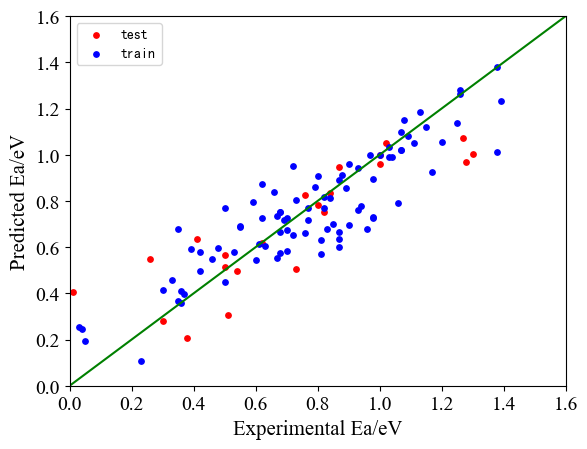

In [11]:
plt.scatter(pred_show.iloc[:,1],pred_show.iloc[:,0],color='r',s=15,label='test')
plt.scatter(pred_show_1.iloc[:,1],pred_show_1.iloc[:,0],color='b',s=15,label='train')
plt.xlim((0,1.6))
plt.xlabel('Experimental Ea/eV',fontsize=15,font=Path('..\TimesNewRoman.ttf'))
plt.xticks(fontsize=14,fontname='Times New Roman')
plt.ylim((0,1.6))
plt.ylabel('Predicted Ea/eV',fontsize=15,font=Path('..\TimesNewRoman.ttf'))
plt.yticks(fontsize=14,fontname='Times New Roman')
plt.plot([0,1.6],[0,1.6],color='g')
# plt.text(40,92,'Ridge',fontsize=20,font=Path('..\TimesNewRoman.ttf'))
plt.legend()
plt.show()

In [13]:
# shap提高解释性
shap.initjs()
explainer = shap.Explainer(model)
shap_values = explainer(feature)
shap.plots.beeswarm(shap_values, max_display=20)
shap.plots.bar(shap_values, max_display=20)
shap.plots.waterfall(shap_values[5], max_display=20)

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVR(C=65, epsilon=0.001155415652530134, gamma=0.017019327295877386)